In [4]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

%matplotlib inline

import csv
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import warnings
from csv_reader import read_csv
from aux import set_smallest_n_zero
from disp import set_font_size, get_ordered_colors
from copy import deepcopy as copy
from analysis_tools import *
from pathlib import Path
from csv_reader import read_csv
from csv_writer import write_csv
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import glob

new_rc_params = {
    'text.usetex': False,
    "svg.fonttype": 'none'
}
matplotlib.rcParams.update(new_rc_params)

plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2.0

warnings.filterwarnings('ignore')

In [5]:
def sort_key(s):
    idx_loc = s.find('INDEX_') + 6
    s_trunc = s[idx_loc:]
    return s_trunc

def plot_param_sweep(file_regex, shape, x_tick_labels=None, y_tick_labels=None, y_label='', x_label='', vmax=1000, scale=1, verbose=False):
    loss_fig, loss_axs = plt.subplots(1, 1, figsize=(3 * scale, 3 * scale), sharex=True, sharey=True)

    all_losses = []
    coefs_matrix = []
    all_sort_keys = []

    for f_idx, file_name in enumerate(sorted(glob.glob(file_regex), key=sort_key)):
        if verbose:
            print(sort_key(file_name))
        all_sort_keys.append(sort_key(file_name))

        loss_data_path = f'{file_name}/train_data.csv'
        loss_data = read_csv(loss_data_path, read_header=False)
        if verbose:
            print(np.array(loss_data[loss_data.columns[2:7]]))
        all_losses.append(np.median(np.array(loss_data[loss_data.columns[2:7]])))


    all_losses = np.array(all_losses).reshape(shape[0], shape[1])
    all_sort_keys = np.array(all_sort_keys).reshape(shape[0], shape[1])
    cbar = loss_axs.matshow(all_losses, vmin=0, vmax=1000, cmap='hot')
    plt.colorbar(cbar, ax=loss_axs)
    loss_axs.set_ylabel(y_label)
    loss_axs.set_xlabel(x_label)

    loss_axs.set_xticks(np.arange(len(x_tick_labels)))
    loss_axs.set_xticklabels([str(l) for l in x_tick_labels], rotation=55, ha='left')
    loss_axs.set_yticks(np.arange(len(y_tick_labels)))
    loss_axs.set_yticklabels([str(l) for l in y_tick_labels])
    
    return all_losses
    
    
#     k_fig.text(0.5, 0.06, 'STDP time const', ha='center')
#     k_fig.text(0.06, 0.5, 'STDP coef', va='center', rotation='vertical')

# Transitions in input parameters

array([[1002.55554517, 1002.55554517, 1002.55554517, 1002.55554517],
       [1084.28150421,  213.97016966, 1084.28150421, 1024.00047432],
       [1002.55554517, 1002.55554517, 1002.55554517, 1002.55554517],
       [1013.27507873, 1799.8253687 , 1013.27507873,  914.80759146]])

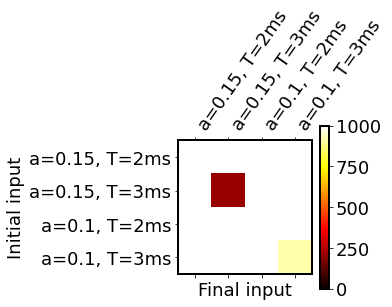

In [65]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

## Two moment control

array([[ 28.91031631,  79.51012242,  20.52933899,  47.14279601],
       [ 44.34458258,  18.32822756,  84.94122389,  26.88527168],
       [ 42.82226408, 139.05123658,  33.04525515,  84.79083247],
       [ 29.26976057,  55.48320016,  32.93435583,  25.5512874 ]])

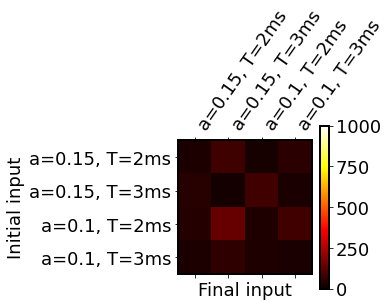

In [18]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.01_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 28.15122588,  80.15355855,  19.49193028,  46.50870825],
       [ 41.78630832,  18.77298661,  78.10099573,  27.13579002],
       [ 42.32655377, 136.65568596,  30.87889684,  81.17609919],
       [ 26.98951467,  56.82550986,  27.81464702,  25.77359307]])

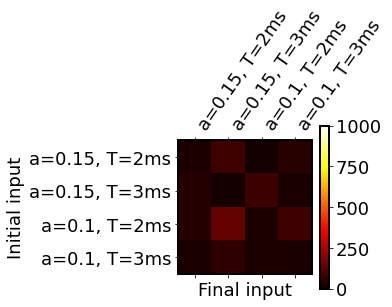

In [19]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 28.15144312,  81.21903502,  19.29118885,  46.0990661 ],
       [ 38.17514379,  19.50875381,  69.0662456 ,  26.74177072],
       [ 43.60713158, 135.11671508,  29.79574279,  78.4712247 ],
       [ 26.50782409,  58.95970035,  24.60685624,  26.13357782]])

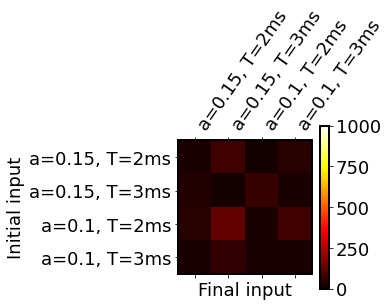

In [20]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[  28.53210301,  128.83179086,   61.98396901,   86.52871955],
       [ 915.63871736,   34.83566497, 2366.32279421,  378.4875471 ],
       [ 197.79594583,  836.87323079,  278.12693957,  753.732876  ],
       [  91.91974588,   31.4026071 ,  232.90076886,   29.67576459]])

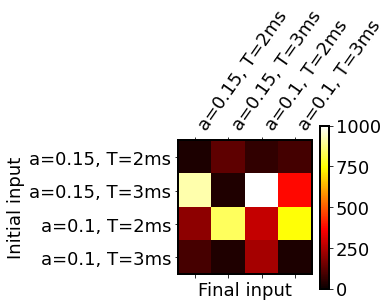

In [21]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.01_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.01_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[  22.99745359,   88.81110694,   46.77969525,   43.87540734],
       [ 608.36606288,   30.07982389, 2212.07300514,  231.52168659],
       [ 137.14280793,  349.97573835,  109.67778655,  207.67653972],
       [  57.36129982,   28.74012333,  340.92351512,   26.2674288 ]])

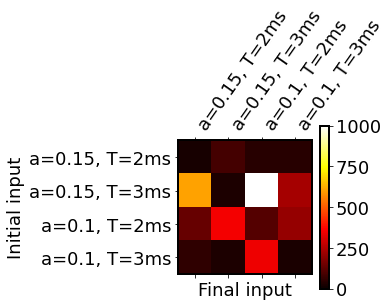

In [22]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.01_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[  24.70068959,   84.04047997,   32.68534829,   41.51328797],
       [ 465.09163095,   30.22204224, 1191.33259652,  144.26829324],
       [ 151.20260077,  240.83509579,  143.52685944,  184.51916732],
       [  31.52097833,   35.30142005,  159.09116272,   19.56327589]])

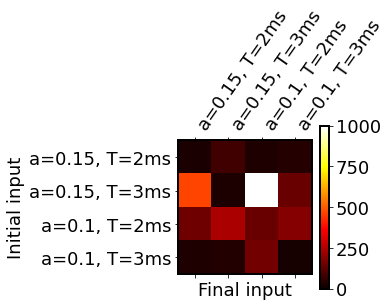

In [23]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.01_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[1.00255555e+03, 1.50810568e+05, 1.00255555e+03, 4.64114772e+04],
       [1.14377745e+03, 1.10510516e+02, 1.14377745e+03, 9.65424309e+02],
       [1.00255555e+03, 1.00255555e+03, 1.00255555e+03, 1.00255555e+03],
       [1.03183906e+03, 1.08123359e+03, 1.03183906e+03, 7.12927833e+02]])

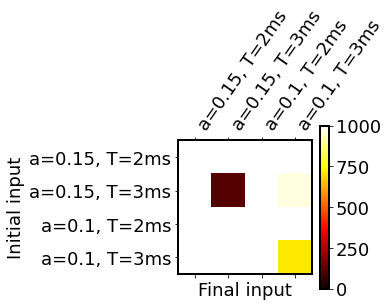

In [24]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.01_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.001_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 903.54791861, 5269.7648145 , 1004.32169748, 3202.09251565],
       [1002.18279324,   37.11765296, 1018.85873785,  579.36264786],
       [1002.55554517, 1002.55554517, 1002.55554517, 1002.55554517],
       [ 835.92820184,  268.9095774 , 1075.60676687,  184.74911301]])

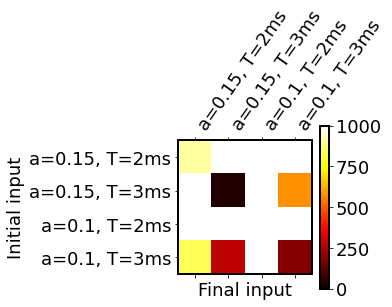

In [25]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.001_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 275.72288232,  233.79278458,  940.48182567,  195.74944631],
       [ 684.20186262,   29.72111922, 1023.34027943,  192.81485595],
       [1002.55554517, 1002.55554517, 1002.55554517, 1002.55554517],
       [ 239.51253788,   50.49073267,  993.10971795,   70.38582114]])

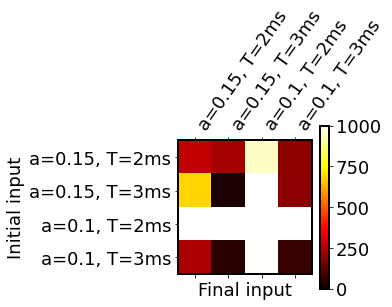

In [26]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.001_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

## Second moment on excitatory synapses

array([[1002.55554517, 1002.55554517, 1002.55554517, 1002.55554517],
       [1115.3357192 ,  129.27900963, 1115.74669052, 1007.98412226],
       [1002.55554517, 1002.55554517, 1002.55554517, 1002.55554517],
       [1022.33620966, 4200.39271516, 1022.33620966,  810.51901277]])

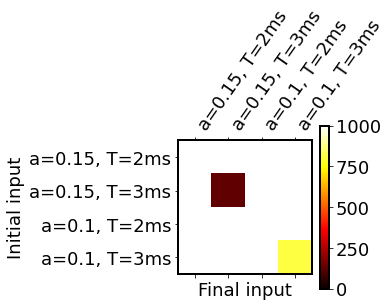

In [27]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.01_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[1002.31815546, 3388.97494047, 1002.55554517, 2790.58663077],
       [1007.74626459,   43.79248632, 1011.2348422 ,  638.73387637],
       [1002.55554517, 1002.55554517, 1002.55554517, 1002.55554517],
       [ 995.52346215,  406.46844827, 1085.24553766,  284.28875496]])

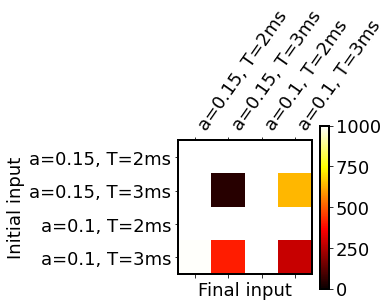

In [28]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 679.72725646,  752.68342816, 1000.42119997,  696.13466904],
       [ 828.50166682,   29.80094955, 1024.75342144,  197.03517053],
       [1002.55554517, 1002.55554517, 1002.55554517, 1002.55554517],
       [ 340.89924884,   65.7170276 , 1043.28784685,   88.59645783]])

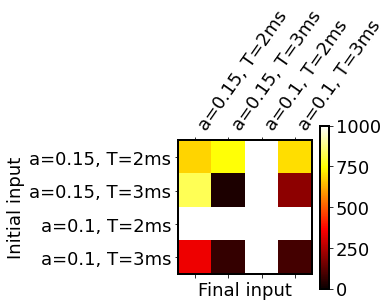

In [29]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[  46.18698202,  126.85913448,  214.42566218,   42.82181855],
       [ 552.53581722,   89.26921786, 1125.56251653,  302.96502703],
       [  85.63669508,  723.14439883,   45.25316284,  106.937393  ],
       [  78.47724087,   36.86269355,  286.01797351,   63.71715346]])

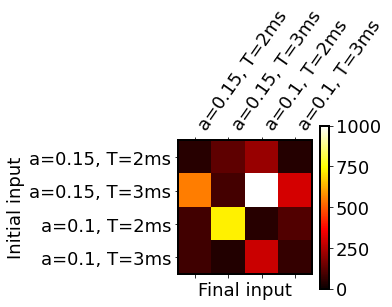

In [30]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.5_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 47.24226158,  68.5390409 ,  88.78897486,  43.3687993 ],
       [260.53224538,  67.26931514, 825.32679158, 212.50614168],
       [ 92.81610097, 236.96234348,  42.85473481, 117.33163091],
       [ 59.75938453,  50.23350438, 149.43100152,  53.38510273]])

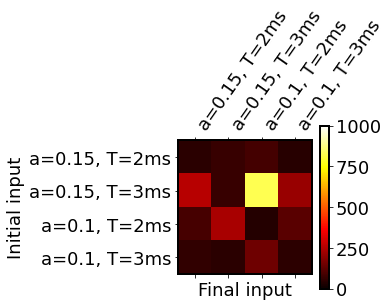

In [31]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_1.0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 47.74754878, 131.45188639,  58.5877081 ,  56.75960662],
       [180.61688287,  47.0367308 , 450.70475089, 149.68263039],
       [135.42057633, 256.27525648,  73.87617678, 149.68488327],
       [ 40.25231596,  68.16574403,  77.19883758,  43.2115414 ]])

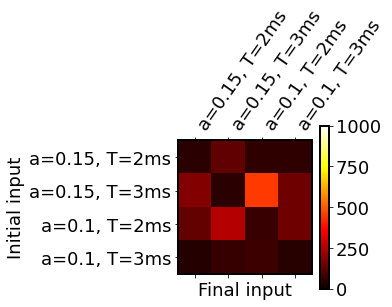

In [32]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_2.0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 41.78006327, 244.66999034,  44.84960178,  52.97882332],
       [130.04050964,  46.60951958, 228.02055929, 112.72106658],
       [121.21545878, 266.54622118,  62.77733889, 146.53689311],
       [ 37.61496222,  77.59932415,  63.62908388,  41.18675824]])

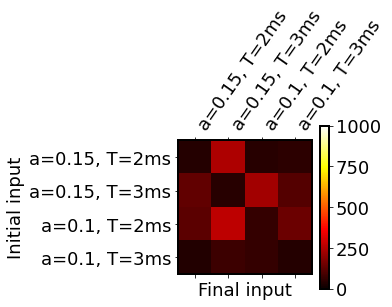

In [33]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_3.0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 38.91363306,  93.76526185,  47.3418503 ,  45.56233754],
       [ 96.33701015,  45.29805636, 176.98485065,  76.15288196],
       [ 81.4731262 , 223.99645186,  43.38089151, 106.55480519],
       [ 42.49236554,  74.75232   ,  63.58054594,  42.88168539]])

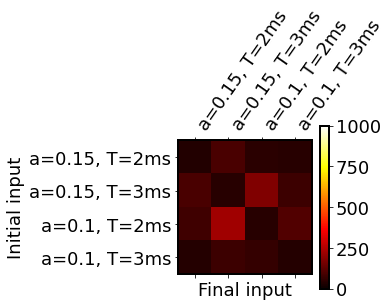

In [34]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_5.0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 40.92110207,  89.1309919 ,  51.18761652,  43.98784792],
       [ 62.5753919 ,  46.06296616, 139.86952624,  53.56607808],
       [ 72.23096021, 211.19027275,  38.29748574,  94.97671039],
       [ 42.1094081 ,  79.04125025,  66.37373716,  42.8600846 ]])

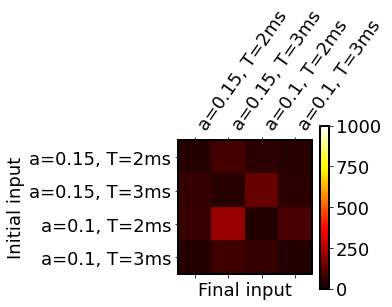

In [35]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_10_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 41.60850409,  89.56518046,  54.00150918,  43.6723212 ],
       [ 60.71630573,  45.45234882, 141.2500708 ,  51.73263727],
       [ 74.47893638, 208.85543933,  37.36199282,  96.68574549],
       [ 41.8579821 ,  74.91259198,  69.4784994 ,  42.87376866]])

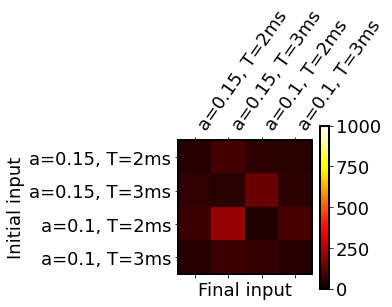

In [36]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_12_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 42.38247915,  92.99271518,  63.81797804,  44.16746654],
       [ 59.78864104,  45.79015177, 143.63945628,  50.55168928],
       [ 75.87590441, 204.97720621,  37.27831628,  97.61268031],
       [ 42.49638404,  75.46689019,  72.13803945,  43.14035882]])

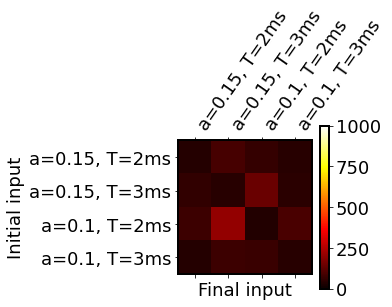

In [37]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_14_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 44.09337214,  93.91927542,  58.02421112,  47.74443603],
       [ 59.62925491,  45.19224426, 126.90988435,  47.91118311],
       [ 76.8261918 , 186.93448794,  36.84850927,  92.6233597 ],
       [ 48.0698588 ,  75.21491689,  65.91612611,  44.88622922]])

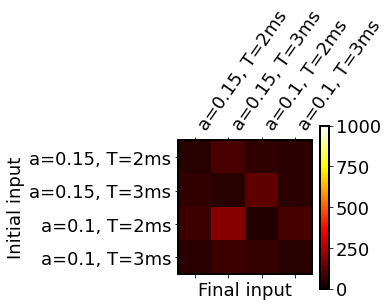

In [38]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_20_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 43.71162055,  72.84572824,  44.39486382,  45.76036281],
       [ 57.72157532,  54.9913629 ,  80.02676131,  55.91646483],
       [ 49.12337424, 114.10135432,  42.81518206,  60.65765765],
       [ 46.25997011,  66.72381811,  48.23835013,  47.32007863]])

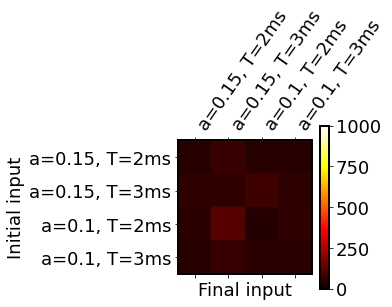

In [39]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_50_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[49.79857536, 66.70204334, 51.55636352, 51.91934233],
       [53.16150574, 53.17983829, 56.59010648, 53.9390995 ],
       [56.10206832, 83.51748524, 50.39920892, 62.85721923],
       [50.7586603 , 60.72778888, 50.32847023, 51.46084252]])

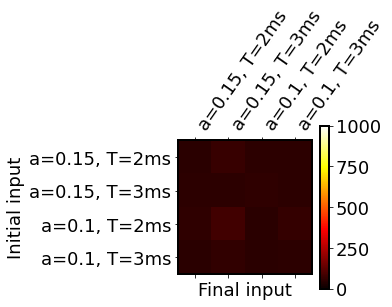

In [41]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_100_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

## First moment on excitatory synapses

array([[1002.55554517, 8597.36615105, 1002.55554517, 4614.73226871],
       [1128.12016747,  114.9700731 , 1140.53199471,  887.34651122],
       [1002.55554517, 1002.55554517, 1002.55554517, 1002.55554517],
       [1036.3567355 ,  577.20320495, 1058.69646405,  550.46559892]])

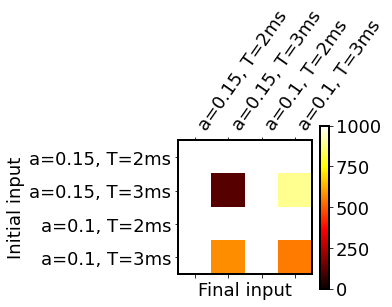

In [68]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.01_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 124.38365753,   36.63800272,  578.68496371,   70.17662409],
       [ 879.19059838,   47.83840218, 1026.58628138,  332.43696078],
       [1000.43760942, 2513.92009812, 1089.23146227, 1040.88969499],
       [ 339.92632484,   34.73297802,  837.55589025,  104.61487596]])

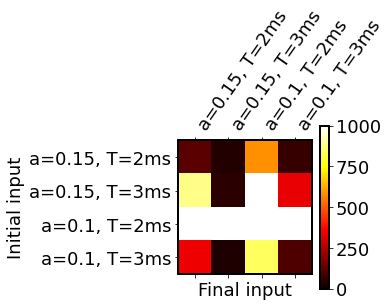

In [3]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 124.44615671,   57.05433294,  460.57298994,   97.27636081],
       [ 976.66961887,  108.6821129 , 1503.36205296,  516.94668326],
       [  84.9083384 ,   97.15155534,  162.89700867,   90.63040463],
       [ 175.32977919,   39.35471825,  750.53064313,  123.72781427]])

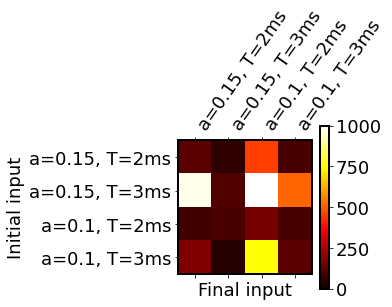

In [4]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.1_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[185.86277614, 202.1665227 , 186.03485667, 187.85645512],
       [744.72216014, 585.78332261, 990.74361516, 696.47017791],
       [183.15447225, 298.62588695, 177.8843138 , 194.6278819 ],
       [184.21410437, 205.90635709, 186.45291944, 191.59921423]])

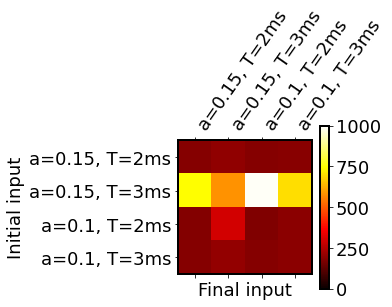

In [18]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.5_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[324.39809109, 387.87357183, 365.83193951, 407.33938738],
       [126.7195884 , 159.94617453, 146.62316824, 158.07201068],
       [460.17807654, 580.25399853, 370.13843015, 446.66005267],
       [252.59347632, 249.76002548, 237.83652483, 270.20849143]])

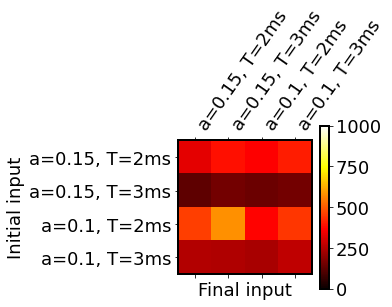

In [19]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_1.0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

In [16]:
def find_batch_num(name):
    idx = name.find('batch')
    trimmed_name = name[idx + 6:]
    idx_underscore = trimmed_name.find('_')
    trimmed_name = trimmed_name[:idx_underscore]
    return int(trimmed_name)

def find_trial_num(name):
    idx = name.find('trial')
    trimmed_name = name[idx + 6:]
    idx_underscore = trimmed_name.find('.')
    trimmed_name = trimmed_name[:idx_underscore]
    return int(trimmed_name)

def plot_activities(dir_name, idx_dir, ic_labels, fc_labels, batch_idx=0):
    scale = 1.5
    fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 7 * scale), sharex=True, sharey=True)
    
    file_regex = os.path.join(dir_name, f'all_r_0_batch_{batch_idx}_trial_*')
#     print(dir_name)
#     print(idx_dir % len(ic_labels))
#     print(ic_labels[int(idx_dir / len(ic_labels))], r'$\rightarrow$', fc_labels[idx_dir % len(ic_labels)])

    initial_activations = []
    final_activations = []

    for file_path in glob.glob(file_regex):

        batch_num = find_batch_num(file_path)
        trial_num = find_trial_num(file_path)

        r = read_csv(file_path, read_header=False)

        if trial_num < 10:
            initial_activations.append(r)
        else:
            final_activations.append(r)

    mean_initial = np.array(initial_activations)
    mean_initial = mean_initial.mean(axis=0)

    mean_final = np.array(final_activations)
    mean_final = mean_final.mean(axis=0)

    if len(mean_initial.shape) > 1:
        n_lines = mean_initial.shape[1]
        cmap = matplotlib.colormaps['plasma']
        colors = cmap(np.linspace(0, 1, n_lines))

        for n_idx in reversed(np.arange(20)):
            axs.plot(np.arange(mean_initial.shape[0]) * 0.1, 0.25 * n_idx + mean_initial[:, n_idx], '--', c=colors[n_idx])
            axs.plot(np.arange(mean_final.shape[0]) * 0.1, 0.25 * n_idx + mean_final[:, n_idx], c=colors[n_idx])
        axs.set_xlabel('Time (ms)')
        axs.set_ylabel('Firing rate')
        axs.set_yticks([])
        axs.set_title(ic_labels[int(idx_dir / len(ic_labels))] + r'$\rightarrow$' + fc_labels[idx_dir % len(ic_labels)])

#         axs.set_xlim(0, 1000)



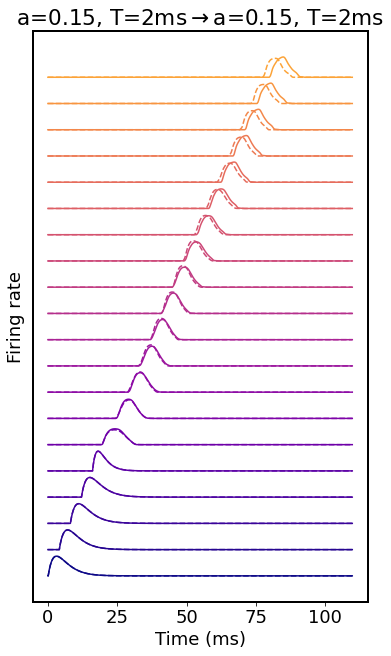

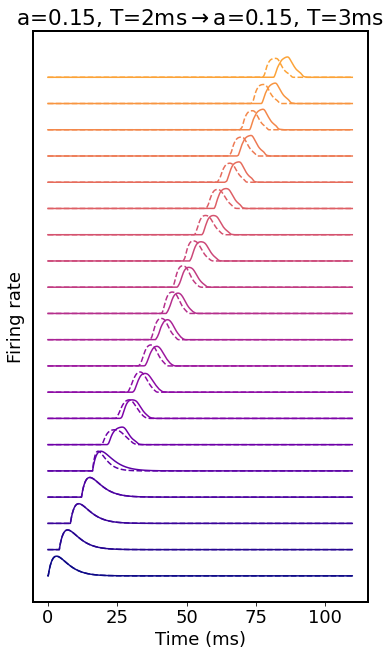

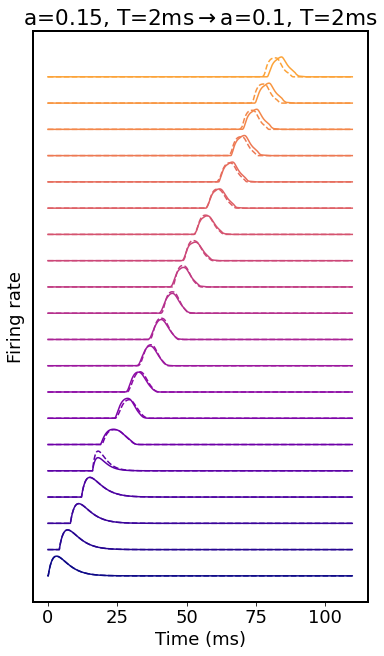

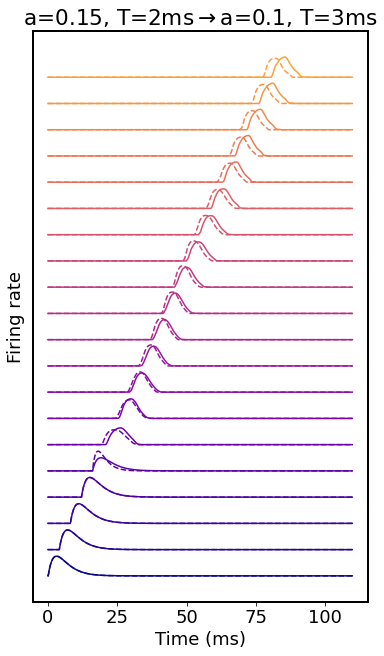

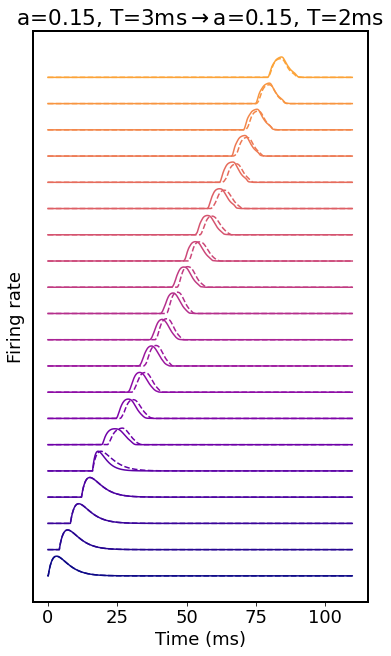

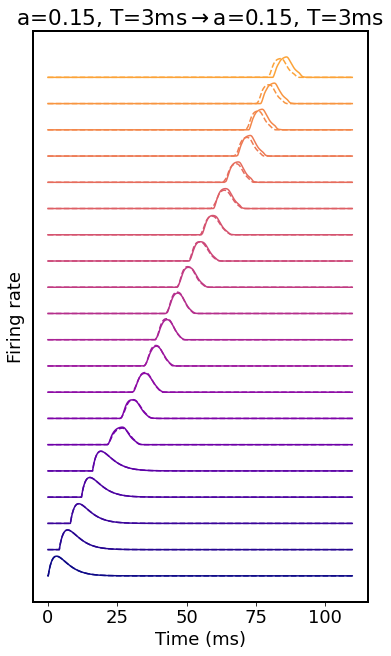

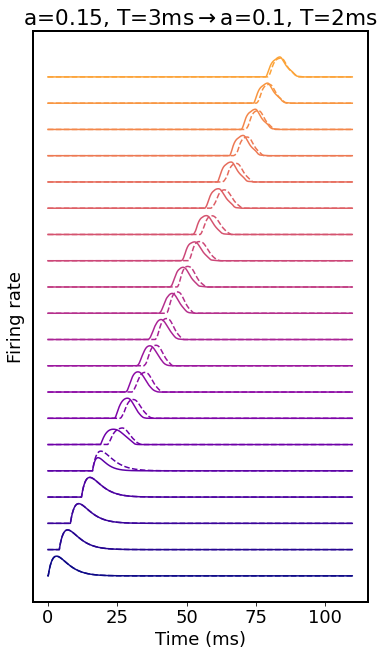

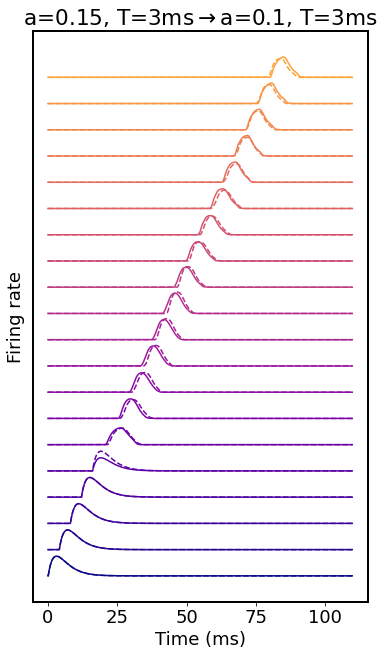

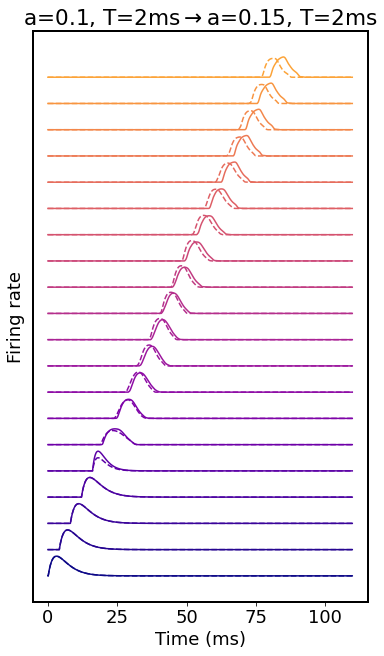

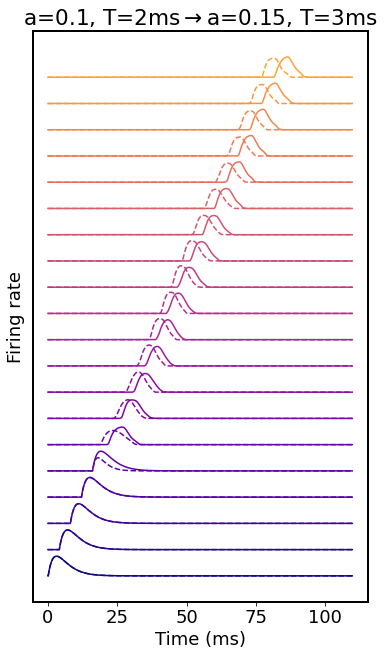

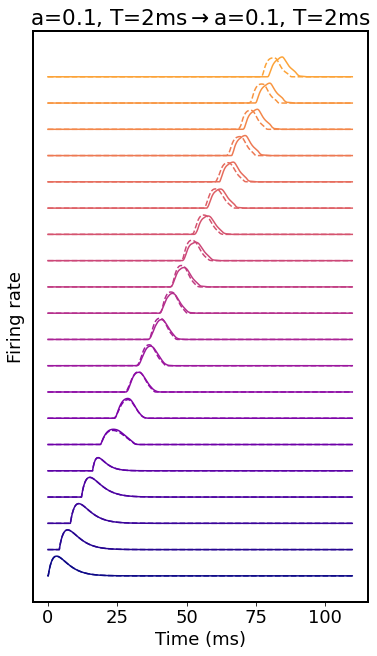

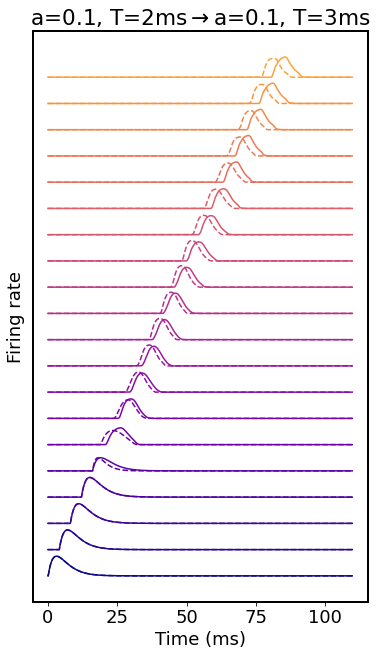

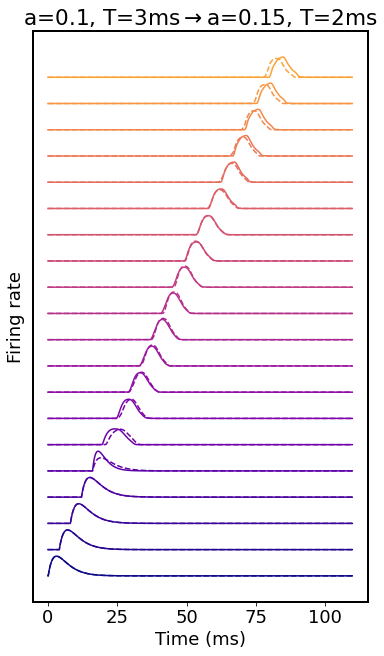

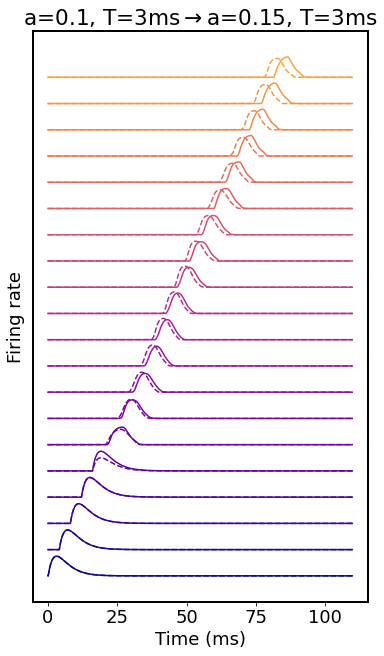

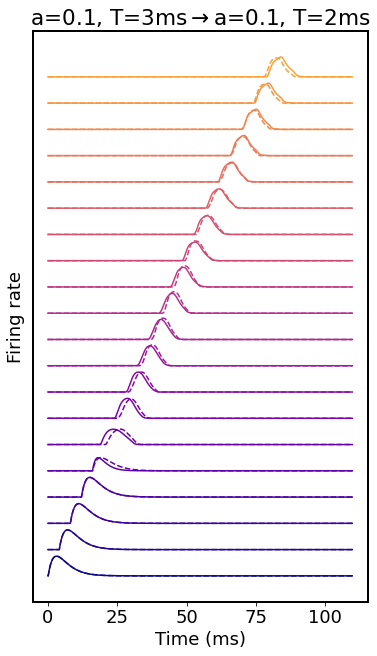

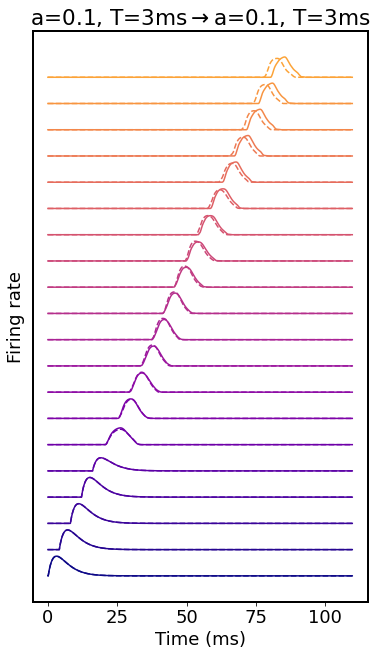

In [7]:
ic_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms']
fc_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms']

file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir, ic_tick_labels, fc_tick_labels, batch_idx=0)

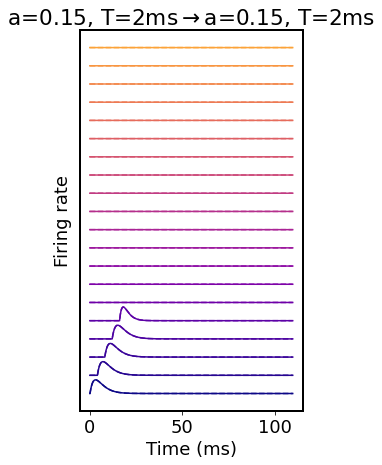

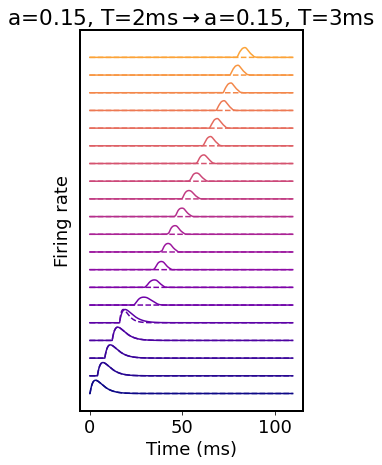

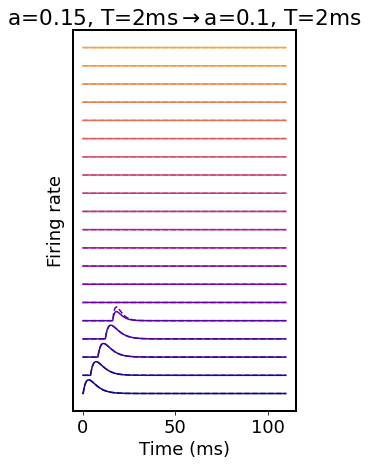

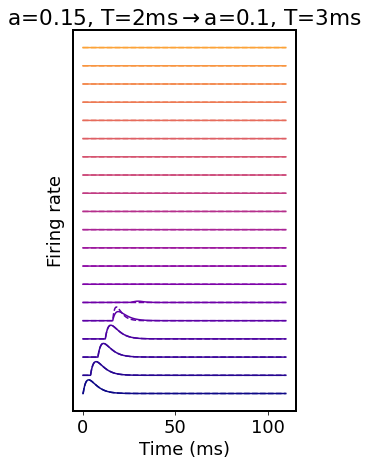

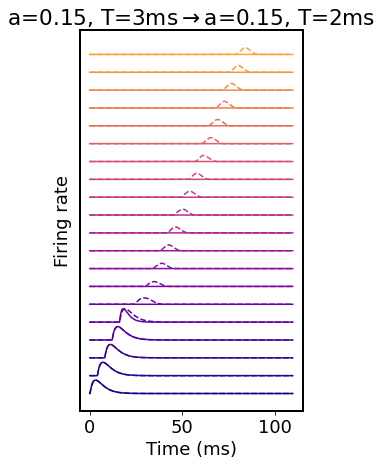

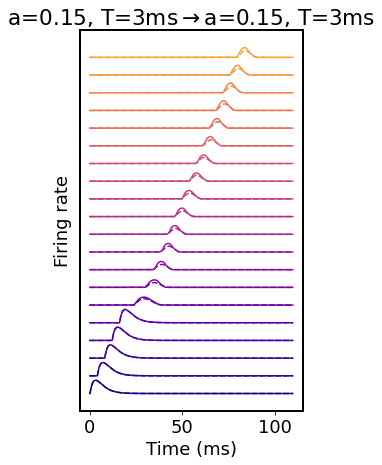

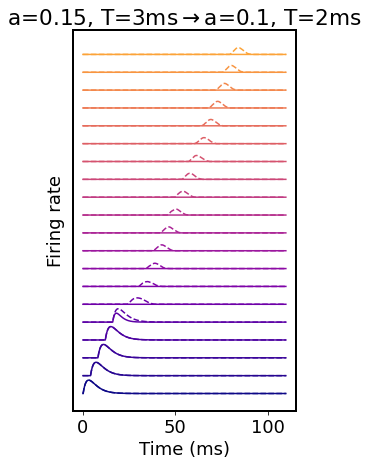

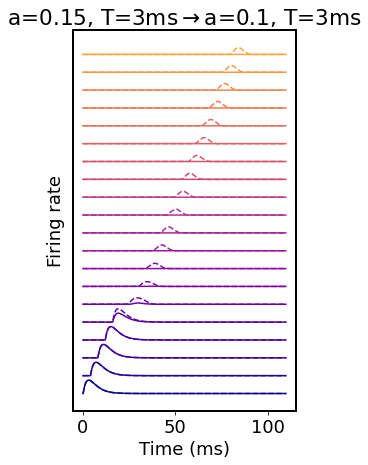

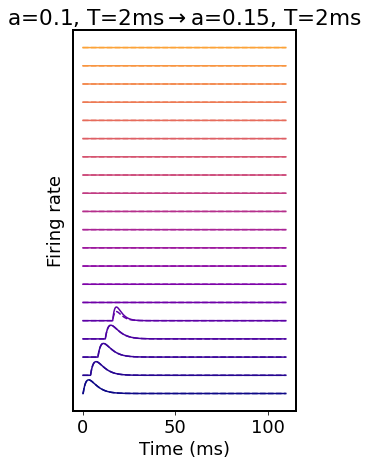

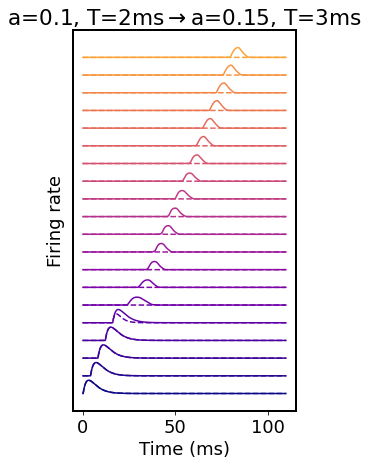

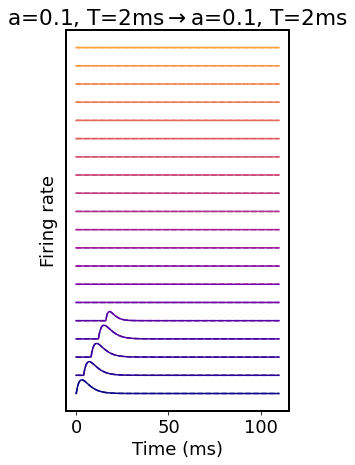

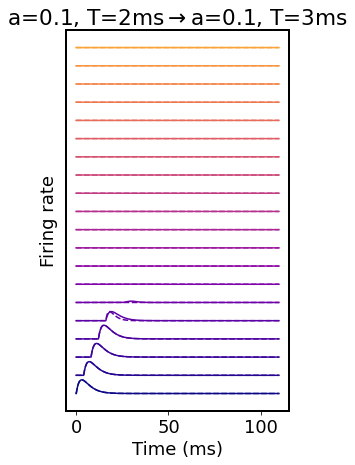

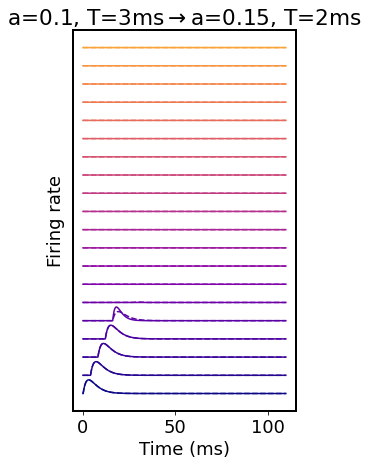

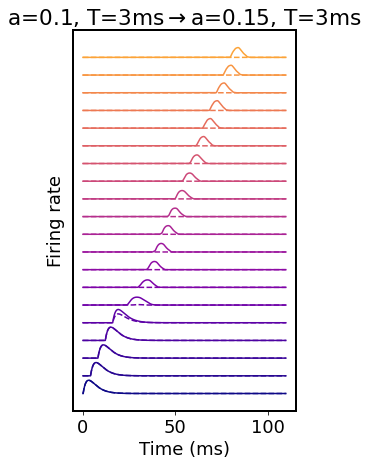

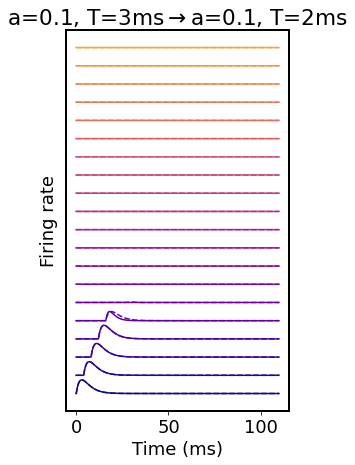

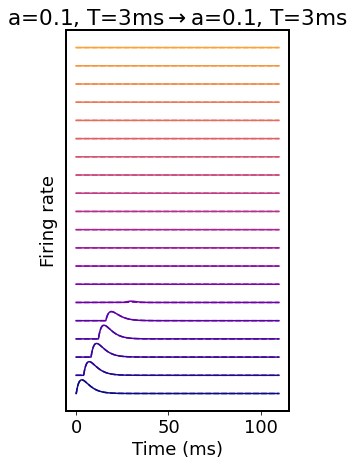

In [10]:
ic_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms']
fc_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms']

file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir, ic_tick_labels, fc_tick_labels, batch_idx=0)

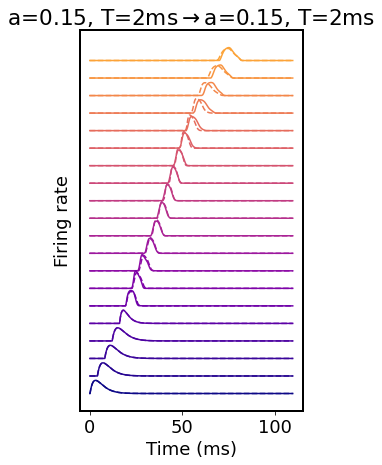

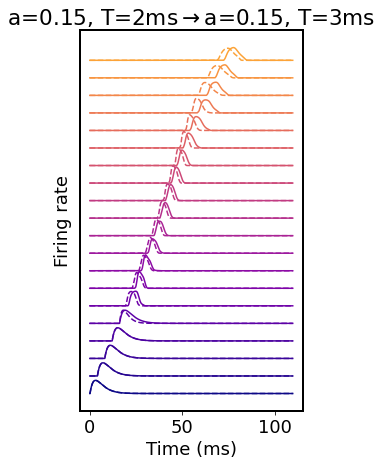

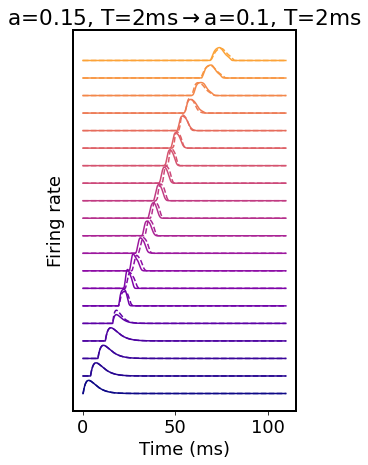

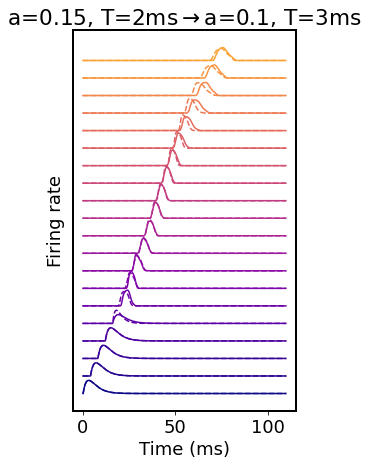

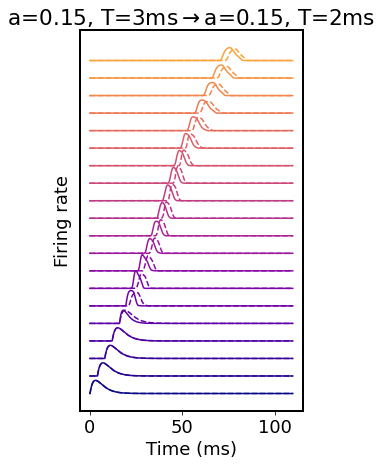

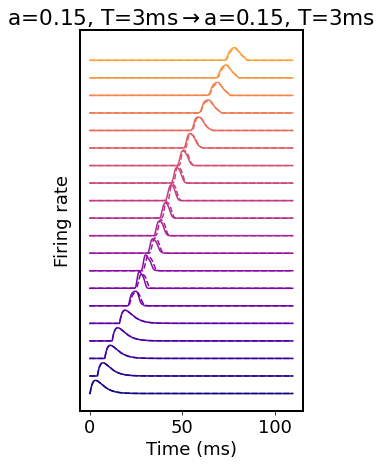

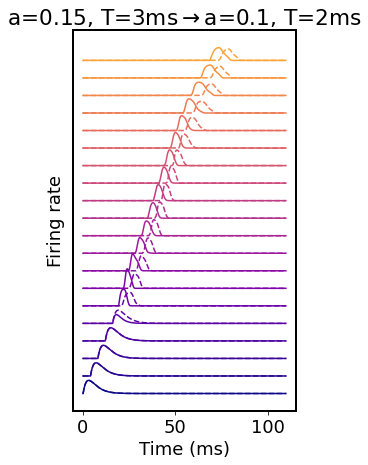

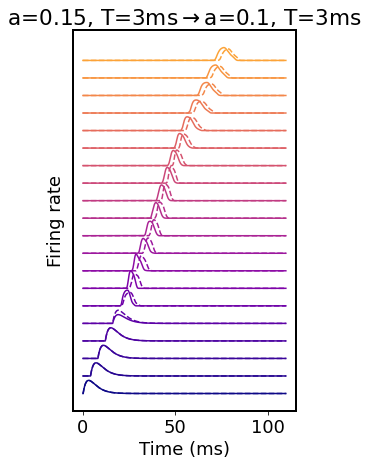

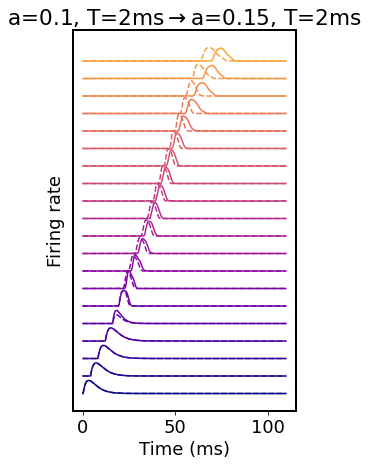

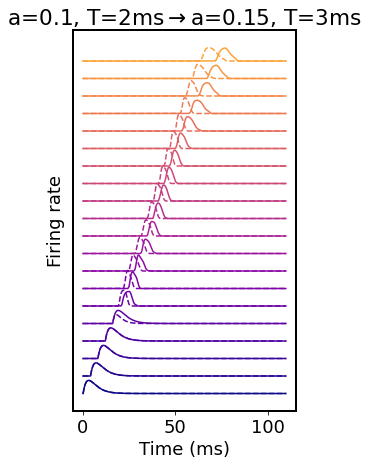

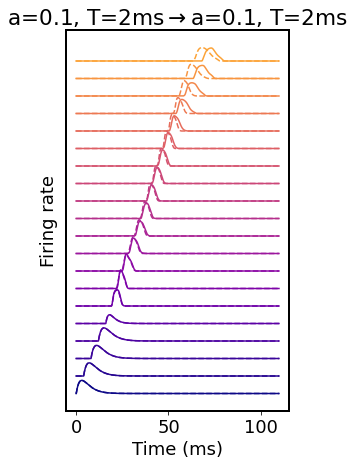

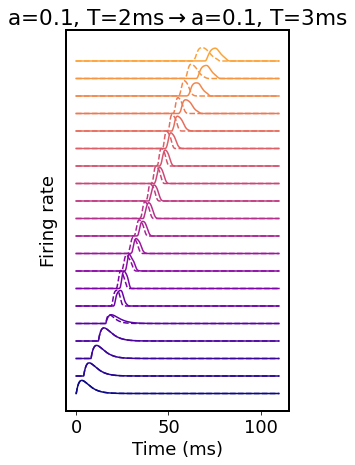

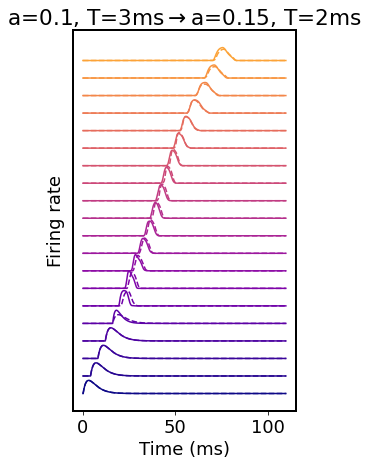

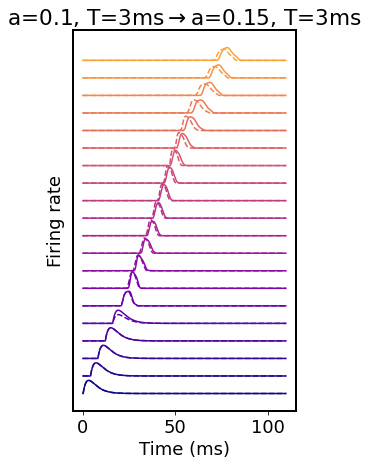

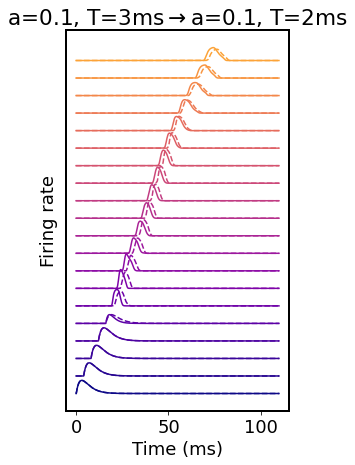

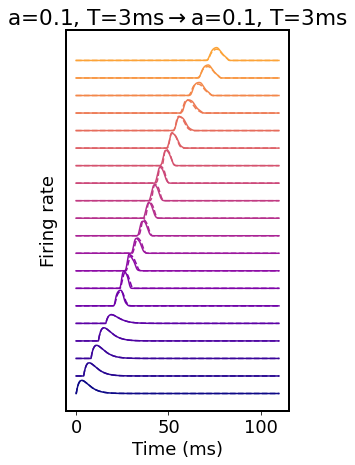

In [12]:
ic_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms']
fc_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms']

file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_2.0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir, ic_tick_labels, fc_tick_labels, batch_idx=0)

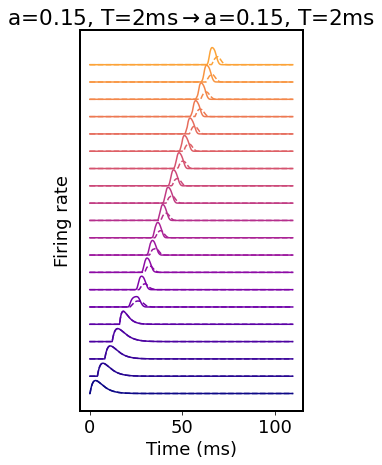

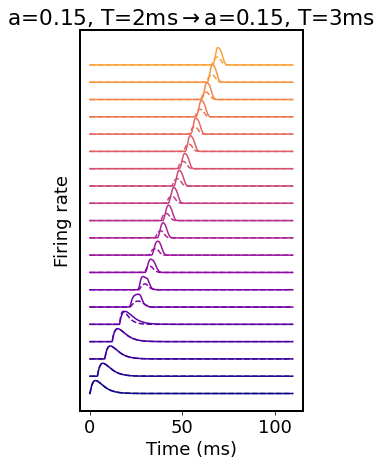

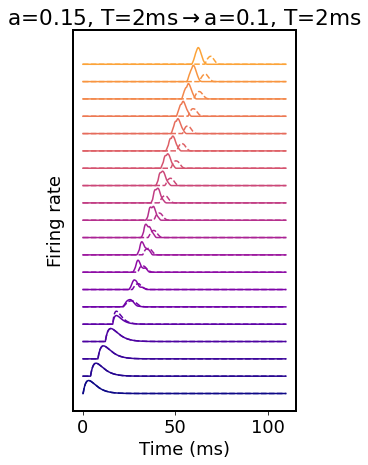

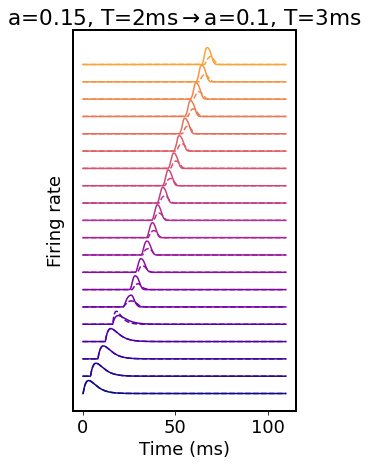

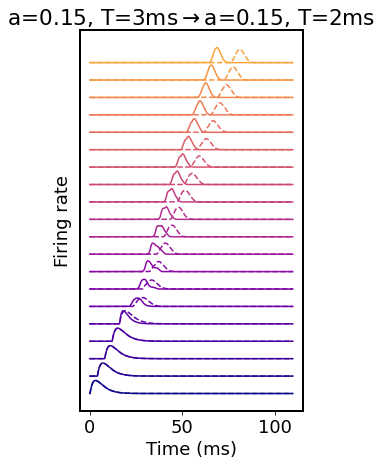

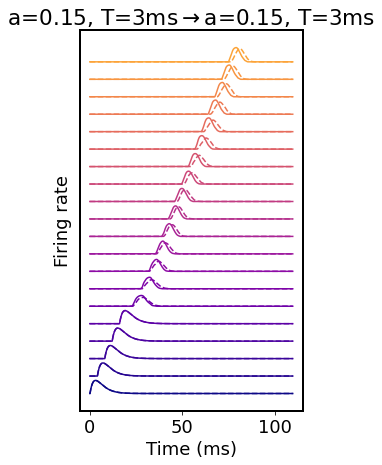

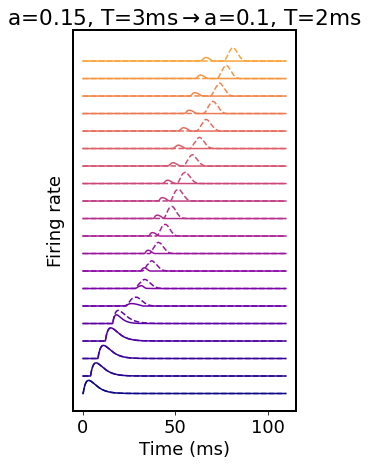

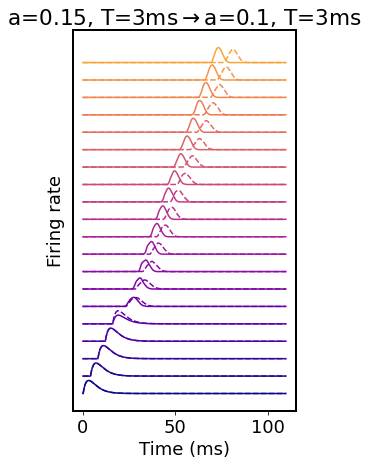

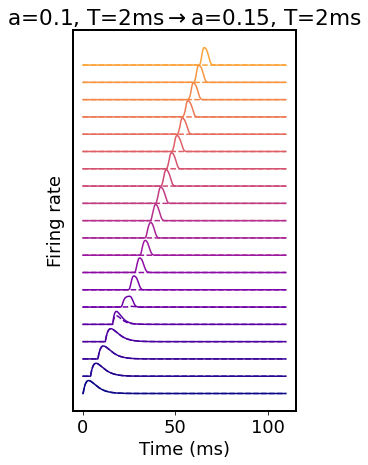

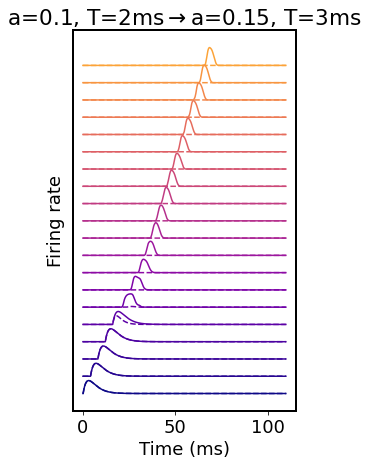

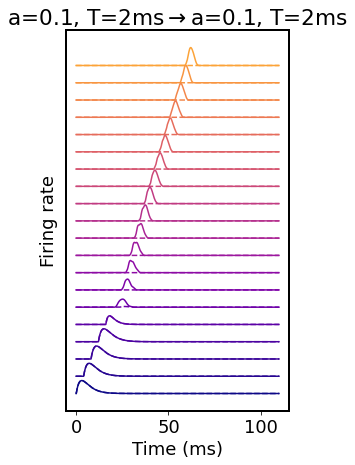

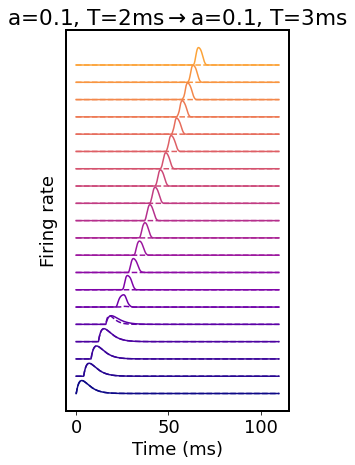

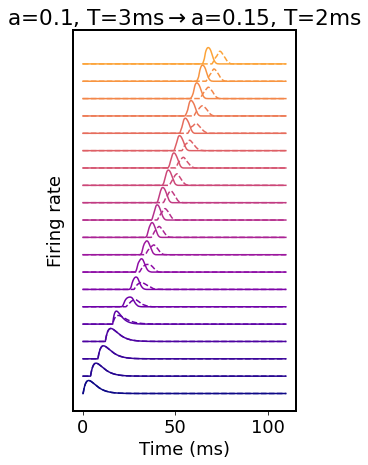

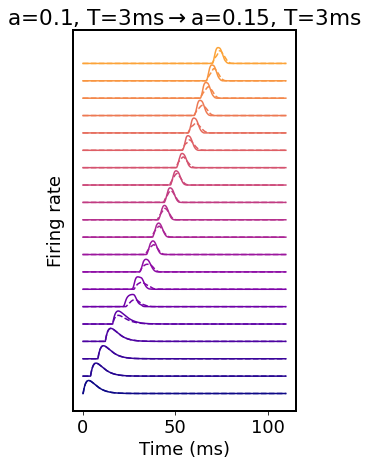

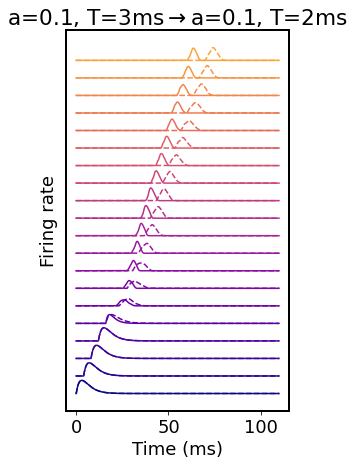

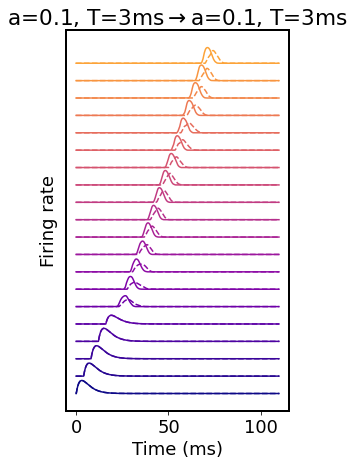

In [15]:
ic_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms']
fc_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms']

file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.4_EXC_RULE_RATE_0.05_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_1_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir, ic_tick_labels, fc_tick_labels, batch_idx=0)

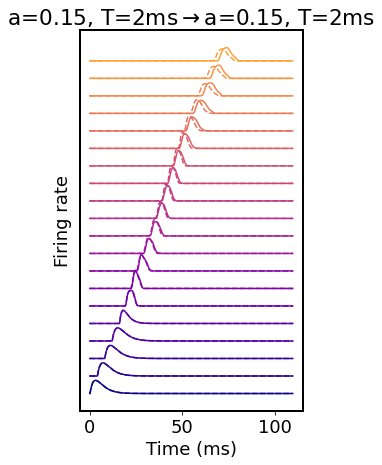

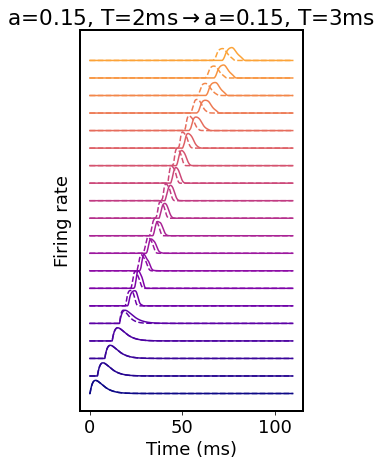

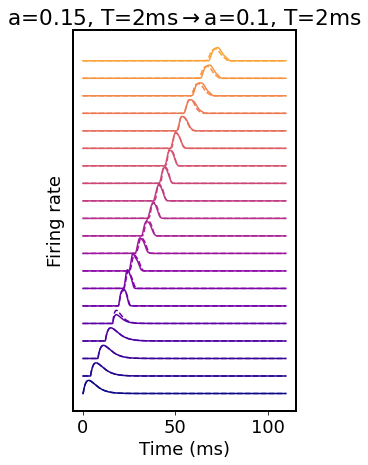

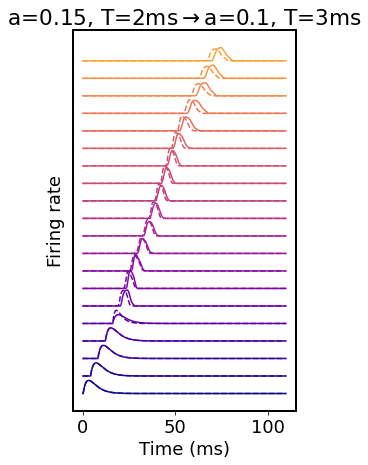

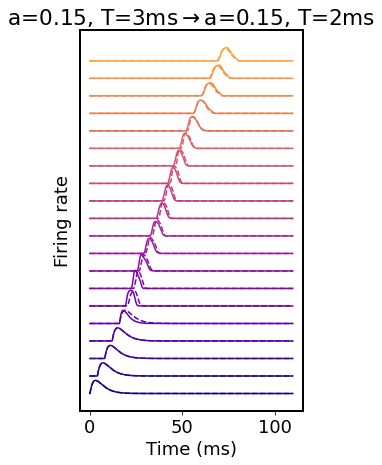

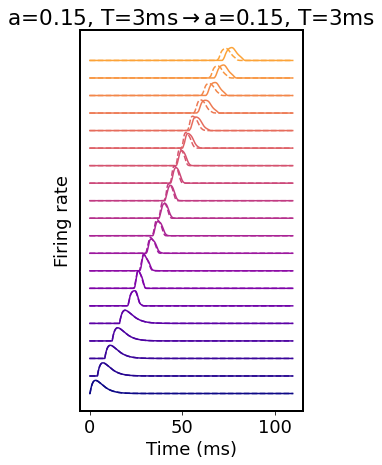

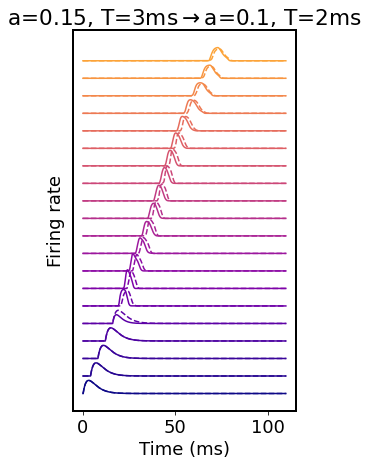

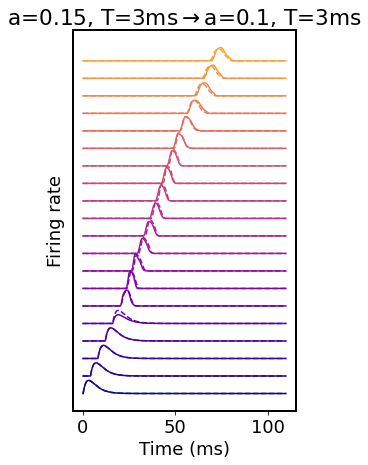

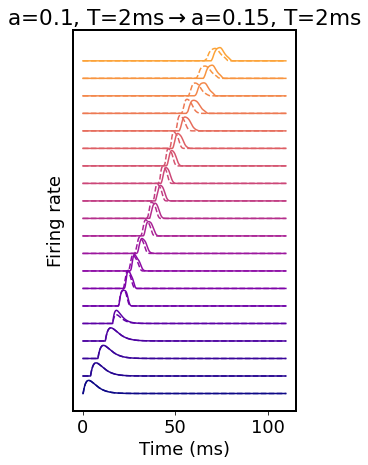

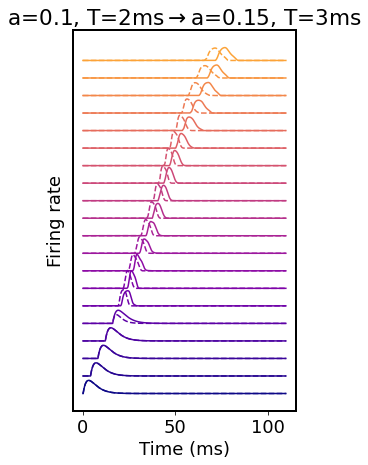

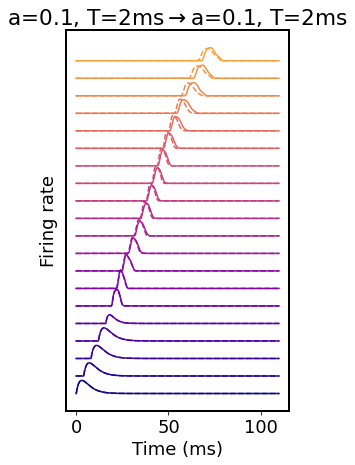

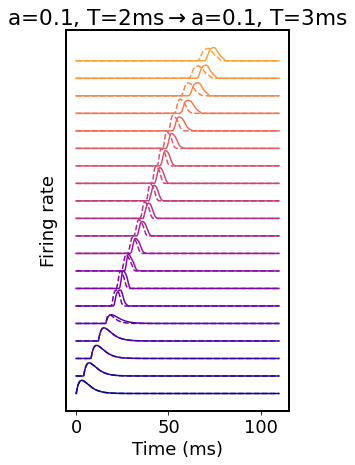

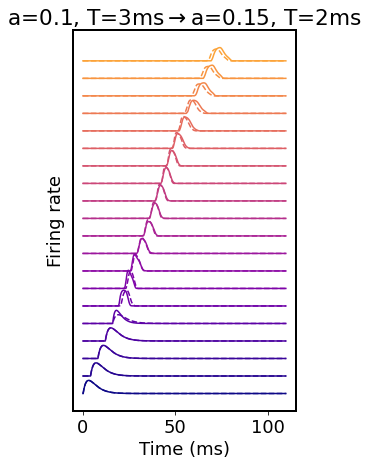

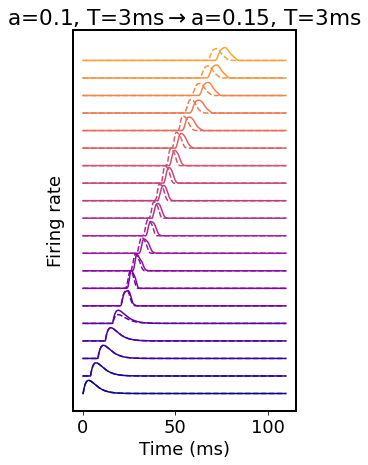

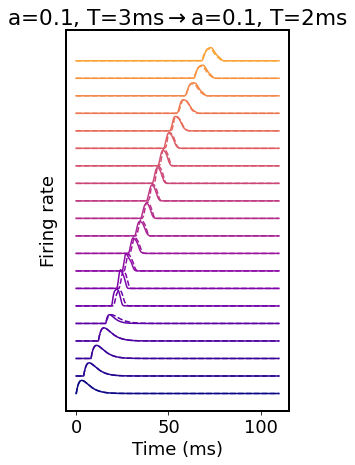

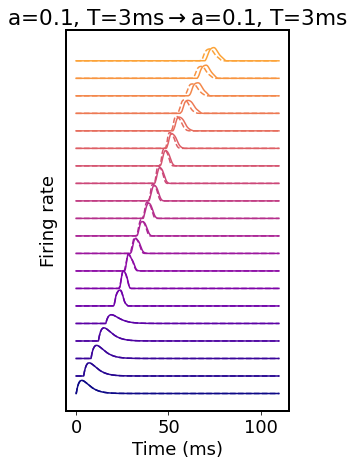

In [12]:
ic_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms']
fc_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms']

file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_14_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir, ic_tick_labels, fc_tick_labels, batch_idx=0)

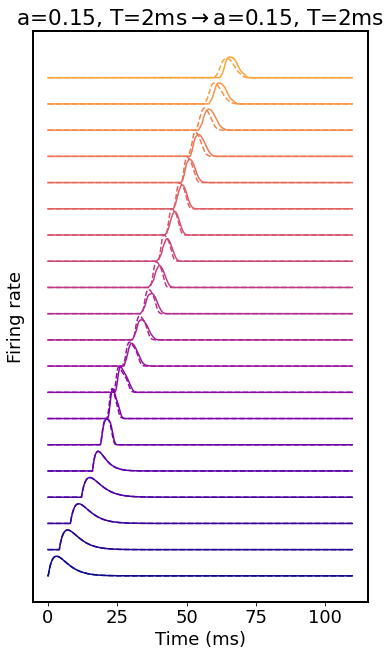

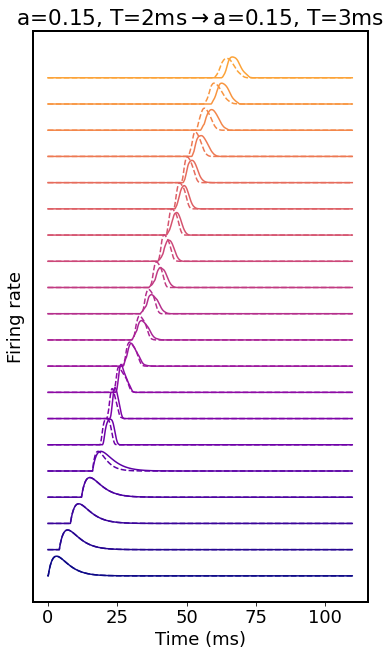

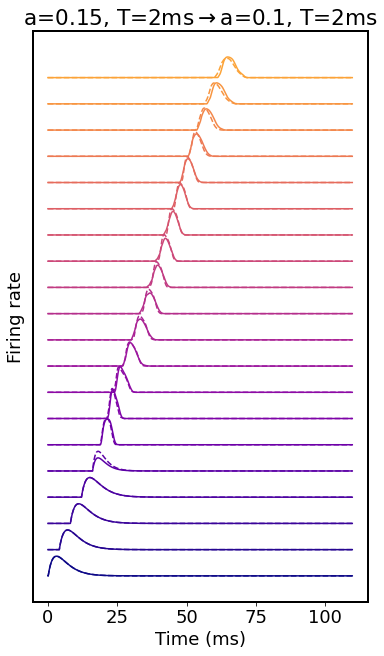

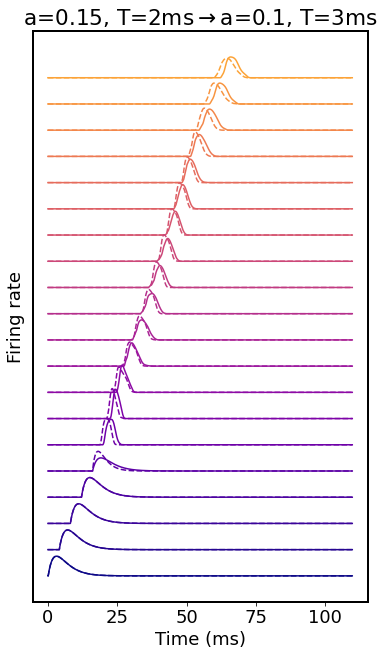

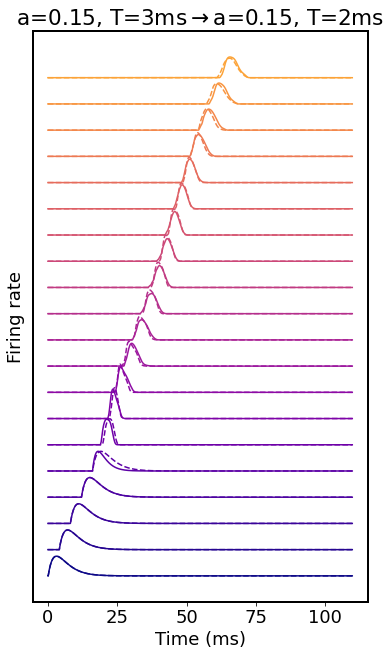

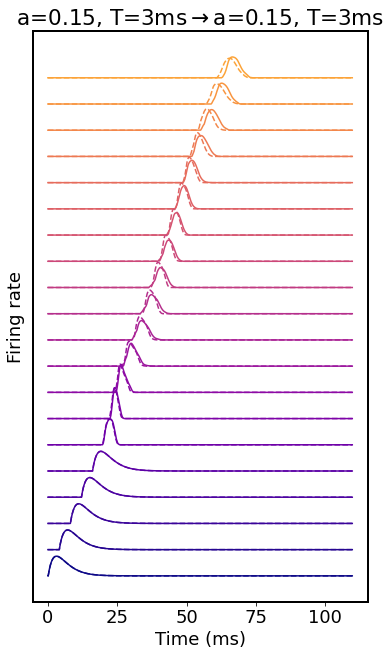

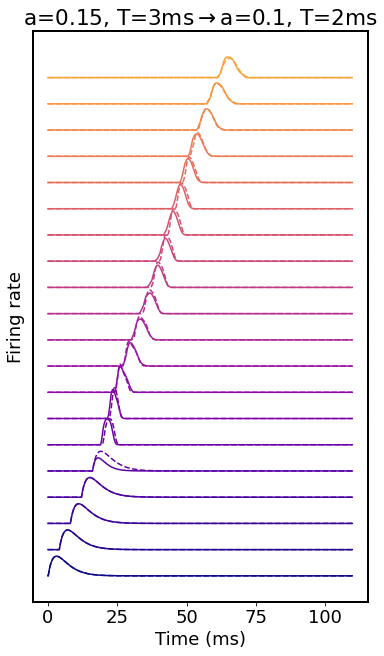

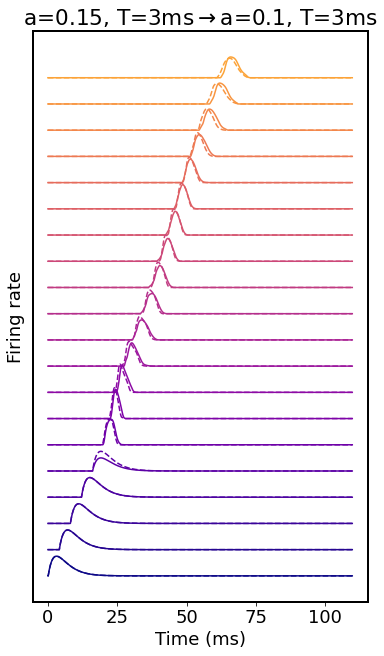

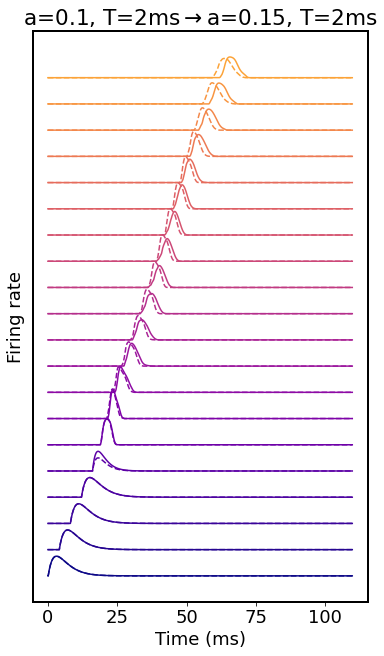

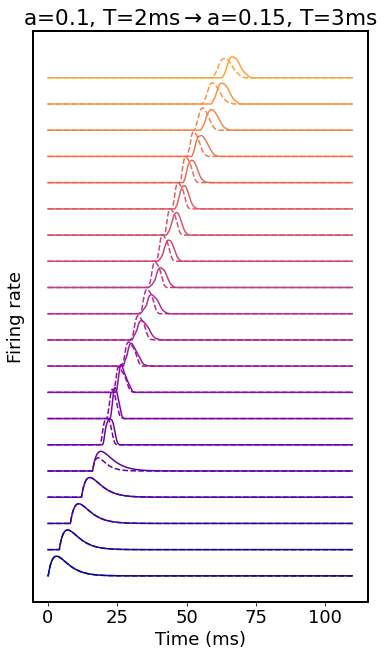

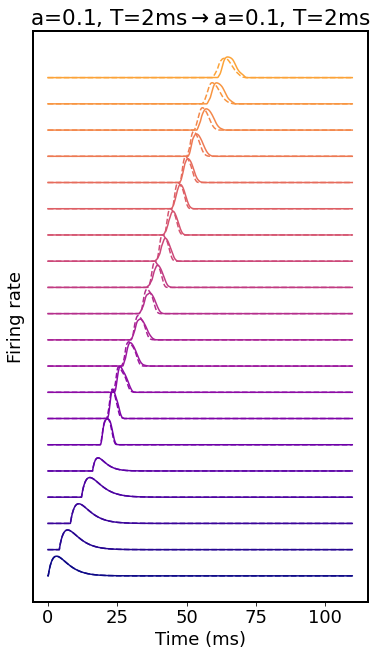

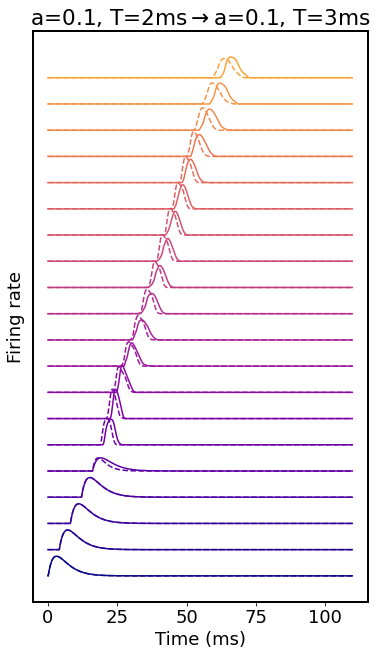

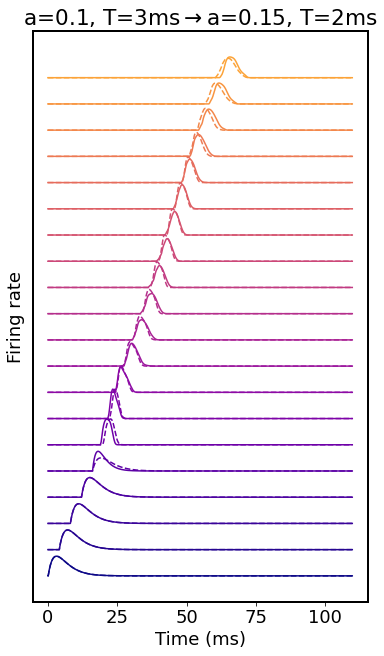

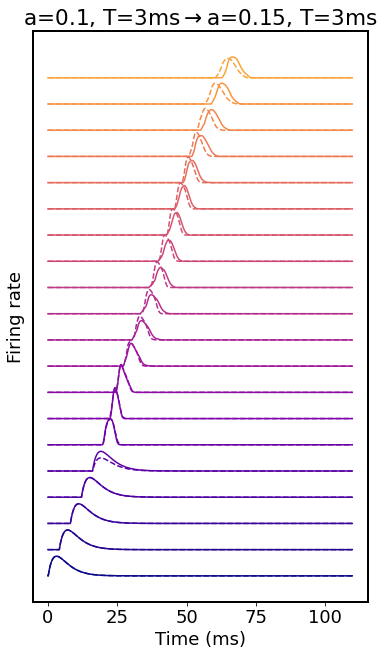

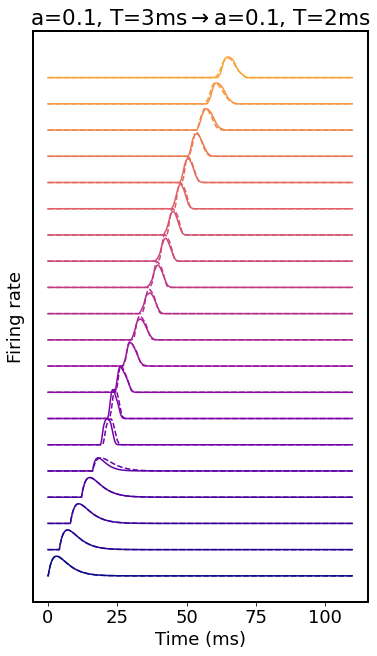

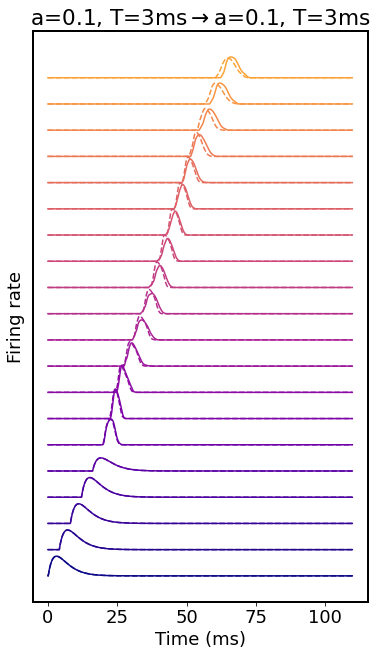

In [5]:
ic_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms']
fc_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms']

file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_100_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir, ic_tick_labels, fc_tick_labels, batch_idx=0)

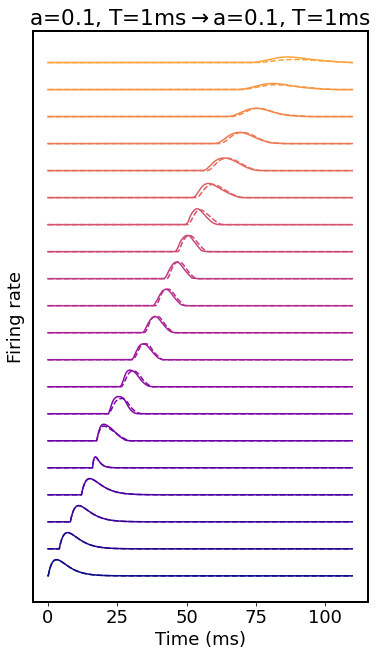

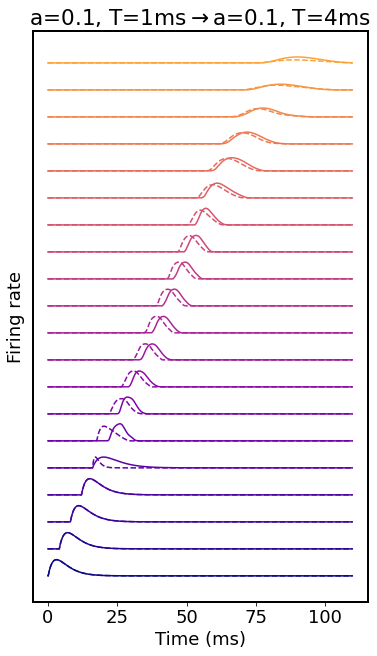

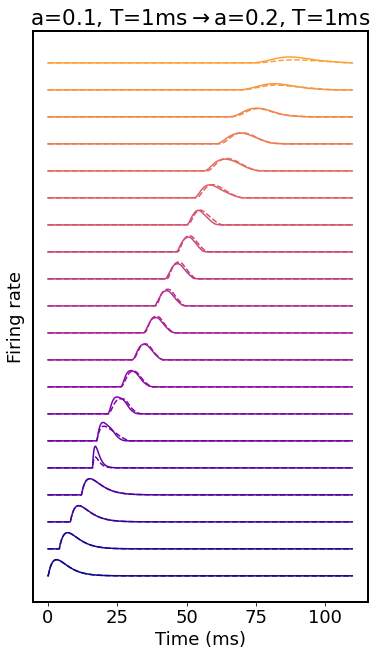

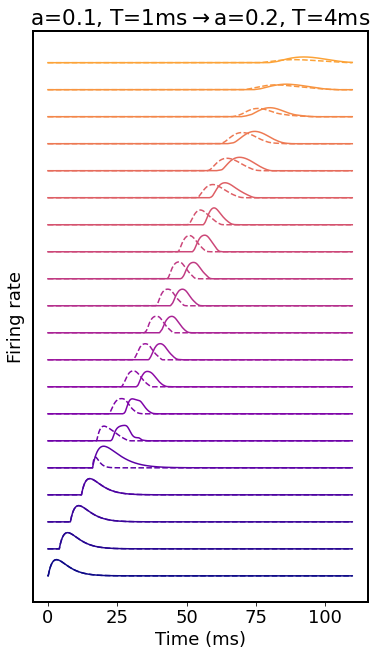

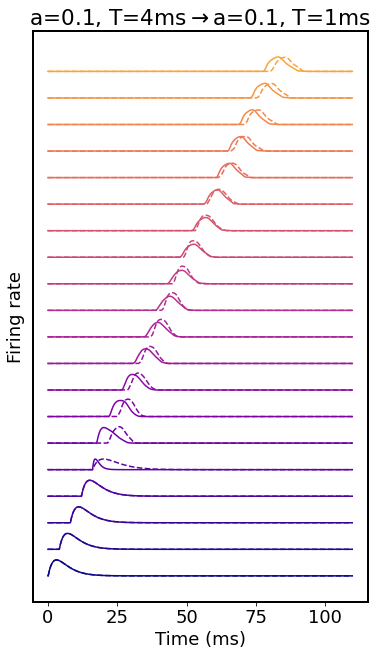

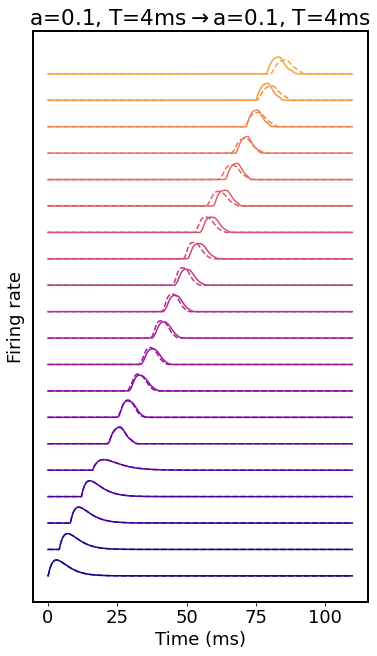

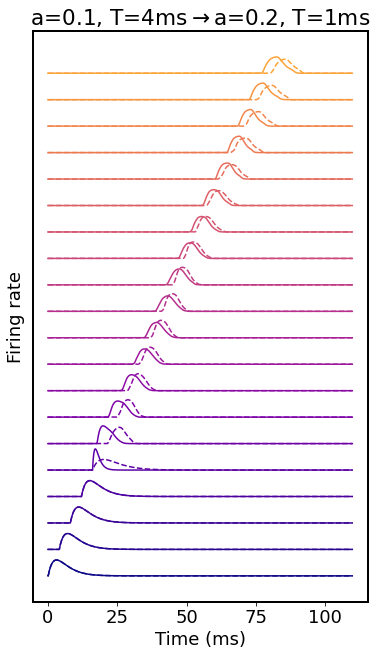

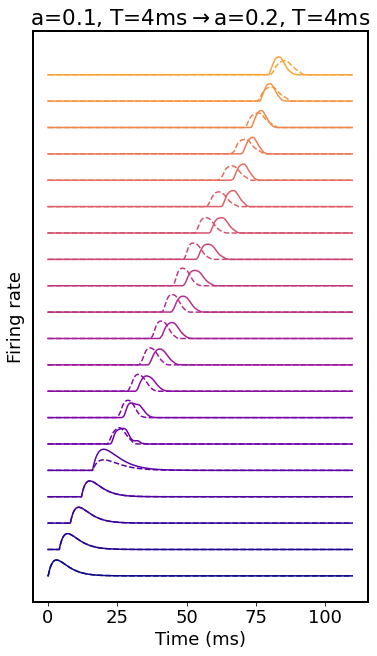

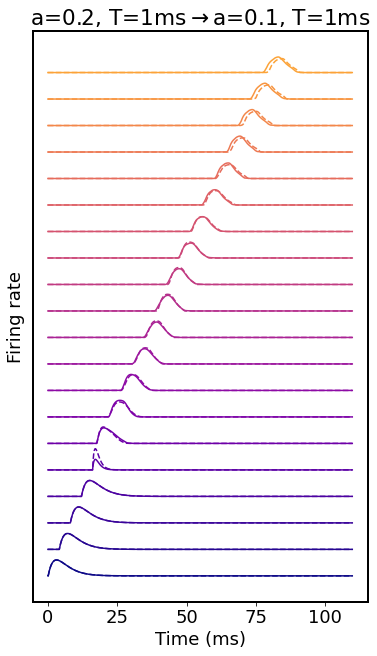

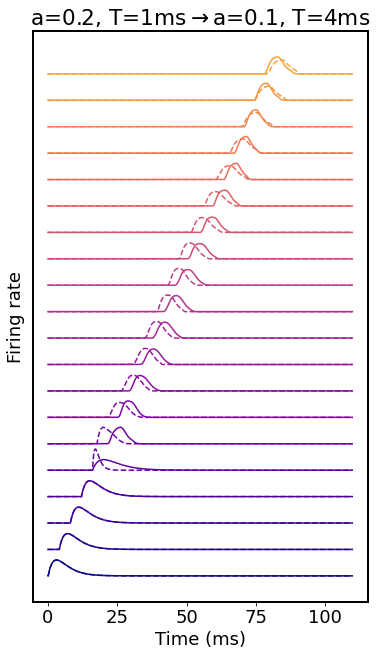

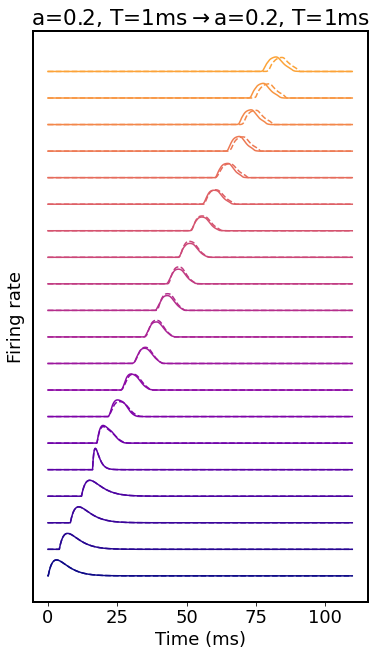

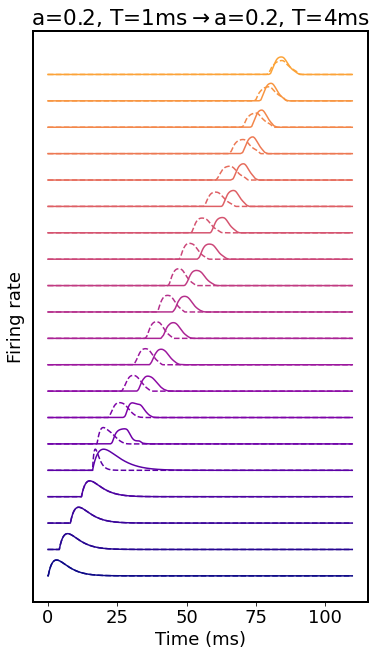

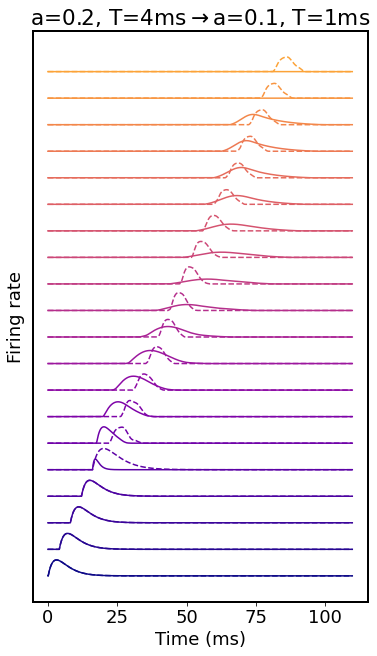

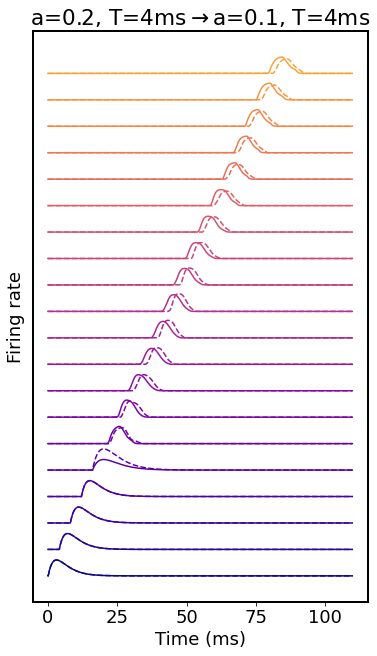

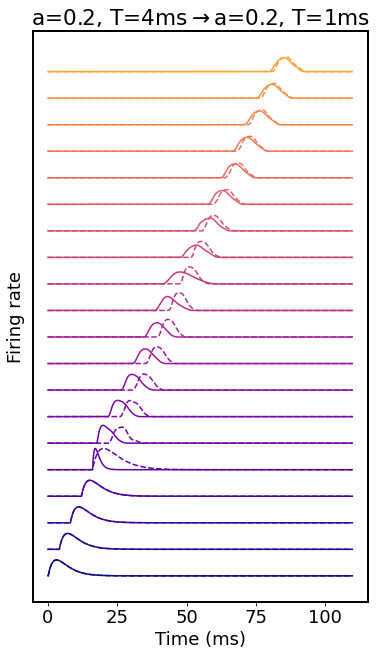

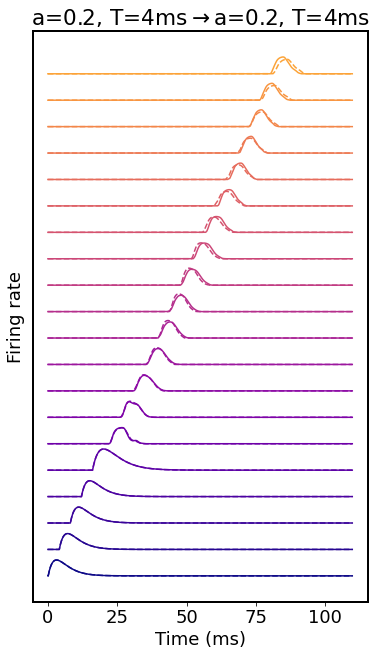

In [22]:
ic_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms']
fc_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms']

file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_1.0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir, ic_tick_labels, fc_tick_labels, batch_idx=0)

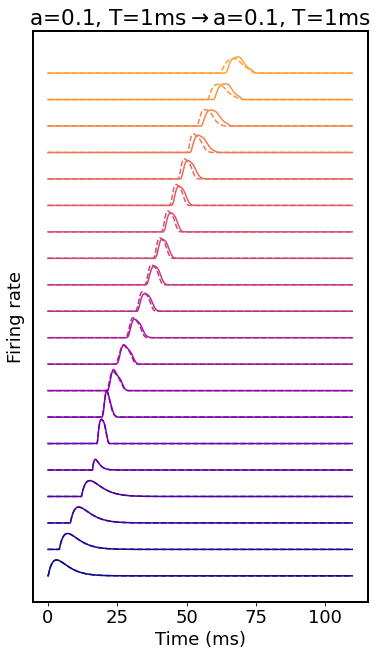

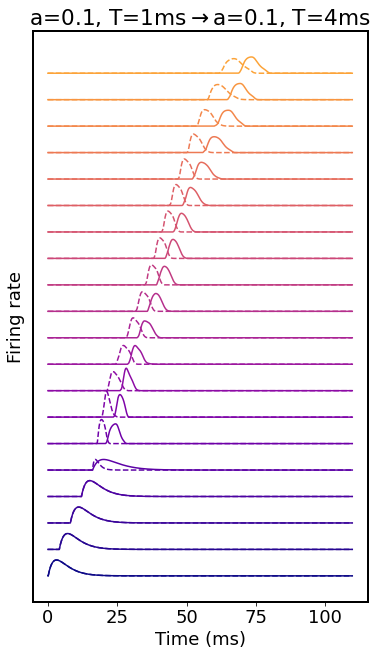

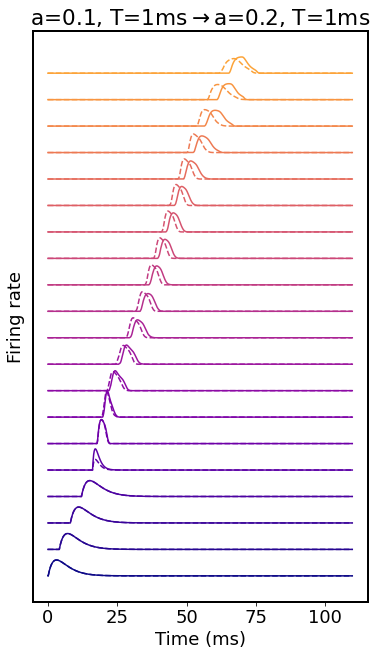

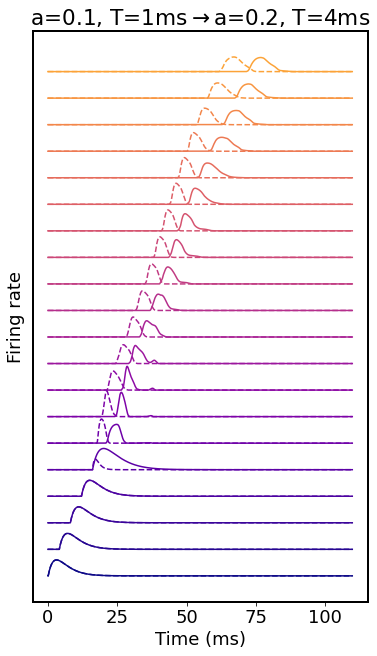

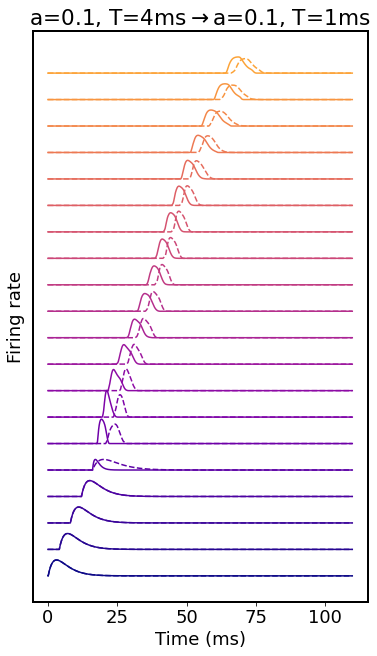

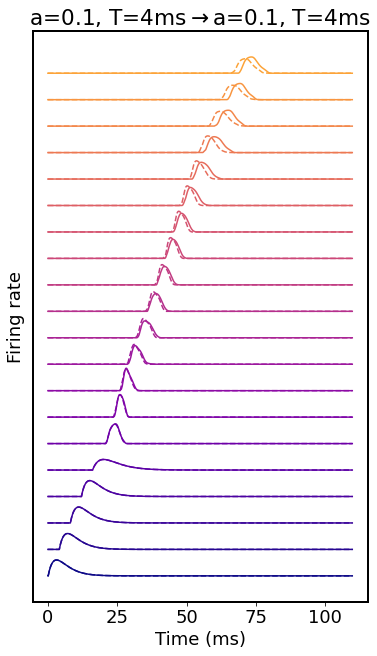

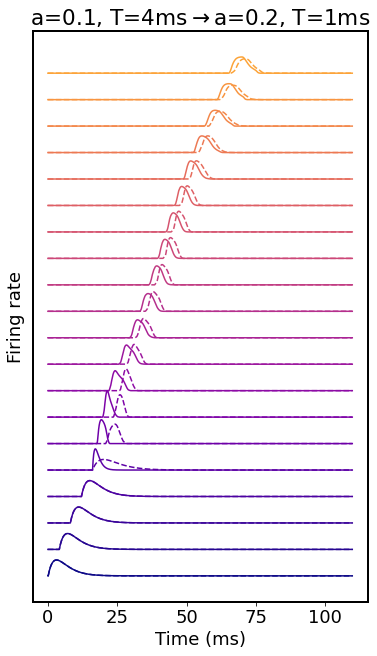

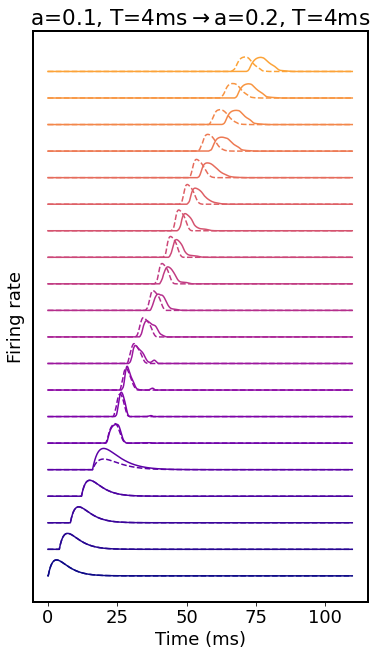

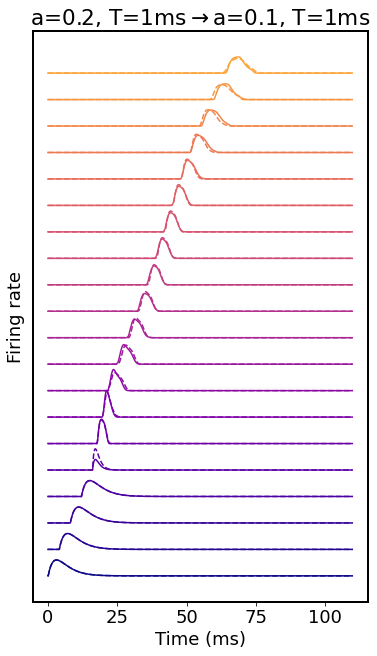

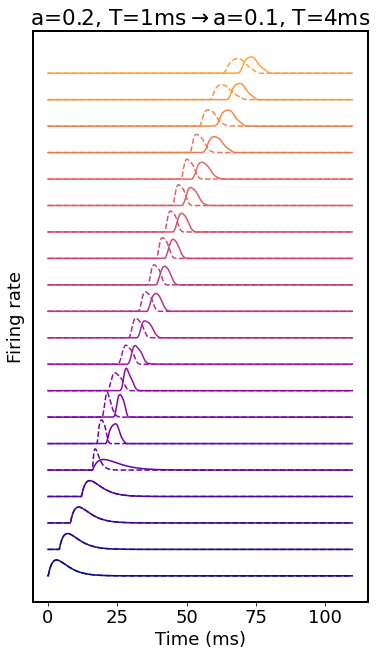

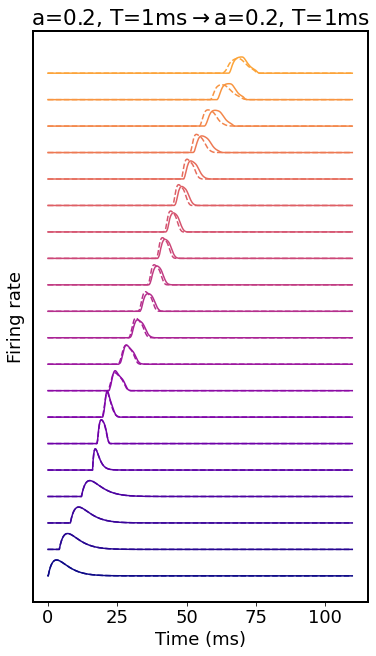

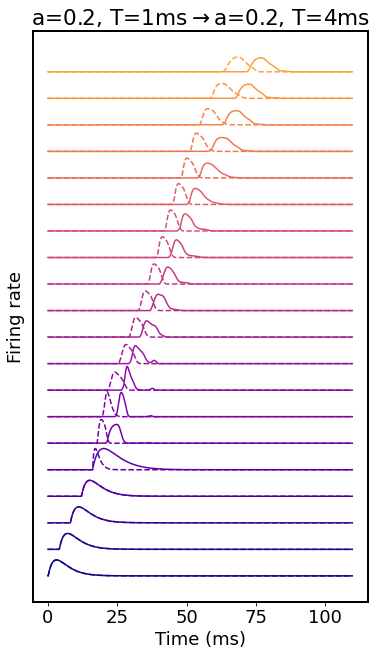

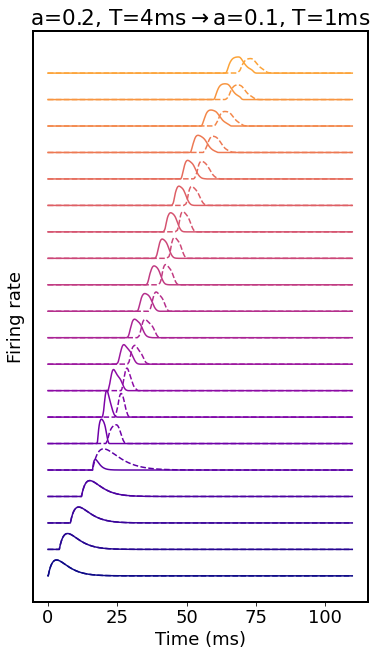

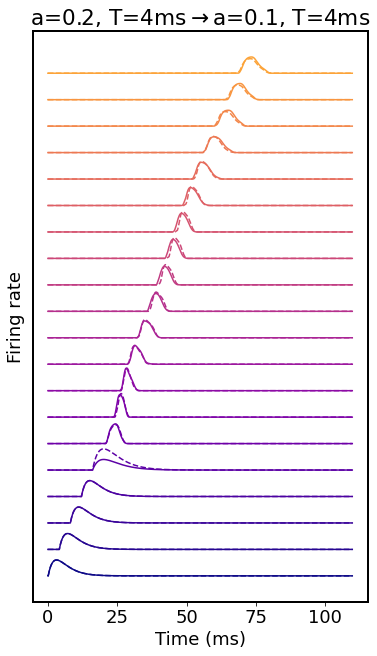

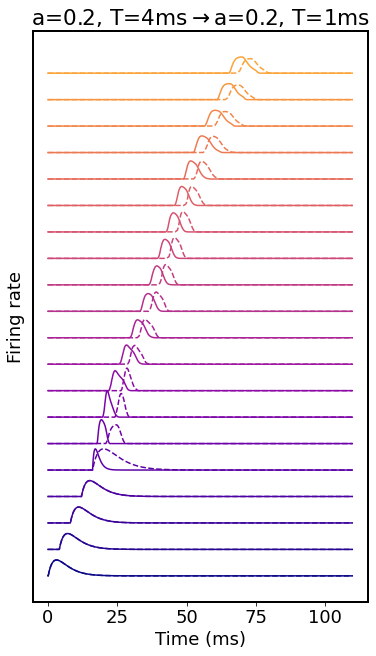

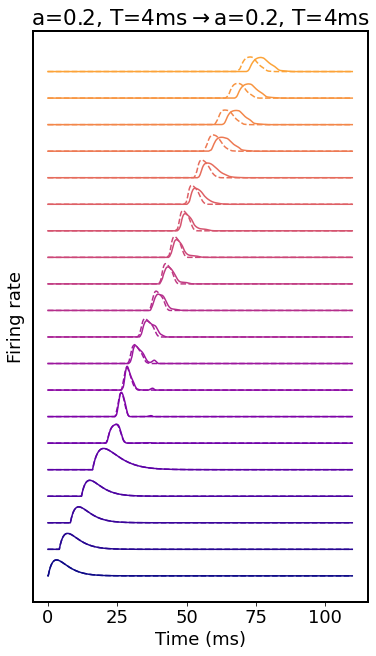

In [17]:
ic_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms']
fc_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms']

file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_20_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir, ic_tick_labels, fc_tick_labels, batch_idx=0)